In [117]:
import jyquickhelper
jyquickhelper.add_notebook_menu(first_level=1, last_level=4, header="Dataset preparation with DatasetPreparator")

# <font color=blus>Software engineering</font>

<img src="./img/SoftwareEngineeringDataAnalysis.png">

In [68]:
%load_ext autoreload
%autoreload 2

In [3]:
import time
import tensorflow as tf
import pandas as pd
import gensim


import p8_util
import p8_util_config
import p9_util


W1030 20:26:38.673341 140430226110272 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1030 20:26:38.676312 140430226110272 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

Using TensorFlow backend.
W1030 20:26:39.626021 140430226110272 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

/home/bangui/.loc

# <font color=blus>1. Data loading</font>

In [1]:
import pandas as pd
df_train = pd.read_csv('./data/train.csv.zip', compression='zip', header=0,\
     sep=',', quotechar='"')
print(df_train.shape)

(1804874, 45)


In [2]:
df_train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

# <font color=blus>2. Data pre-processing</font>

## <font color=blus> 2.1. Check NAN rate into columns</font>

In [3]:
ser_train_isna = df_train.isna().sum()
ser_train_isna

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

    It is shown that all features have samne number of Nan values.
    It is expected that filtering a Nan value over a single identity feature lead to filter 
    same rows with Nan values over others identities features.

## <font color=blus> 2.1. Identities analysis</font>

In [4]:
list_identity = ['asian','atheist','bisexual','black','buddhist','christian','female','heterosexual',\
                 'hindu','homosexual_gay_or_lesbian','intellectual_or_learning_disability','jewish',\
                'latino','male','muslim','other_disability','other_gender','other_race_or_ethnicity',\
                'other_religion','other_sexual_orientation','physical_disability',\
                 'psychiatric_or_mental_illness','transgender','white']
print("Number of identities : {}".format(len(list_identity)))

Number of identities : 24


In [5]:
df_train_identity = df_train[~df_train['asian'].isna()][list_identity+['target']]
print(df_train_identity.shape)
print(df_train_identity.columns)

(405130, 25)
Index(['asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian',
       'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'target'],
      dtype='object')


In [6]:
df_train_identity.sample(3)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,target
277406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863135,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_train_identity.isna().sum()

asian                                  0
atheist                                0
bisexual                               0
black                                  0
buddhist                               0
christian                              0
female                                 0
heterosexual                           0
hindu                                  0
homosexual_gay_or_lesbian              0
intellectual_or_learning_disability    0
jewish                                 0
latino                                 0
male                                   0
muslim                                 0
other_disability                       0
other_gender                           0
other_race_or_ethnicity                0
other_religion                         0
other_sexual_orientation               0
physical_disability                    0
psychiatric_or_mental_illness          0
transgender                            0
white                                  0
target          

In [8]:
df_train_identity[df_train_identity['asian']>0].sample(10)

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,target
632515,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1720930,0.166667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275909,0.500000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1151510,0.833333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1774224,0.300000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666205,0.100000,0.0,0.0,0.0,0.0,0.800000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1353720,1.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2
1330879,0.750000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1
821981,0.100000,0.0,0.1,0.0,0.0,0.000000,0.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0
837016,0.166667,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


    Identities are converted into labels ranging from 0 to 10

In [10]:
import p9_util

for identity in list_identity :
    print(identity,end='\r')
    df_train_identity[identity] = df_train_identity[identity].apply(lambda value : p9_util.y_cont_2_label(value, decimal_count=1, value_type='scalar'))

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.
W1104 19:54:54.015809 140083256256320 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1104 19:54:54.016598 140083256256320 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W1104 19:5

    Also target is converted into labels ranging from 0 to 10

In [11]:
df_train_identity['target'] = df_train_identity['target'].apply(lambda value : p9_util.y_cont_2_label(value, decimal_count=1, value_type='scalar'))

In [12]:
df_train_identity.columns, len(df_train_identity.columns)-1

(Index(['asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian',
        'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
        'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
        'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
        'other_religion', 'other_sexual_orientation', 'physical_disability',
        'psychiatric_or_mental_illness', 'transgender', 'white', 'target'],
       dtype='object'), 24)

    Organize identities into groups

In [13]:
dict_group_listidentity={'ethnic':['asian','latino','white','black','other_race_or_ethnicity'],\
                    'religious':['atheist','buddhist','christian','hindu','jewish','muslim','other_religion'],\
                    'genre':['male','female','other_gender','transgender'],\
                    'sexual_orientation':['bisexual','heterosexual','homosexual_gay_or_lesbian','other_sexual_orientation'],\
                    'disability':['intellectual_or_learning_disability','other_disability','physical_disability','psychiatric_or_mental_illness']}

In [14]:
nb_identity = 0
for group, list_identity in dict_group_listidentity.items() :
    nb_identity += len(list_identity)
print("Number of compounded identities= {} ".format(nb_identity))

Number of compounded identities= 24 


/home/bangui/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


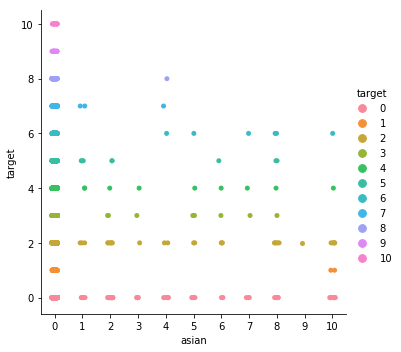

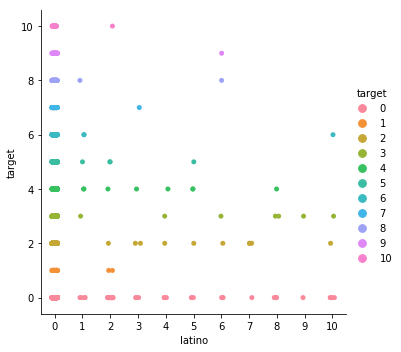

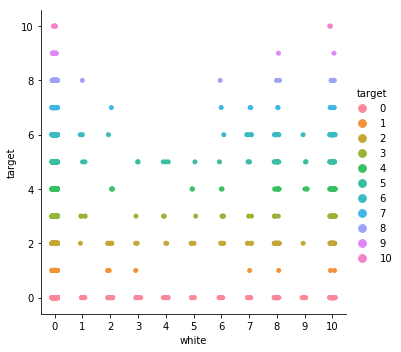

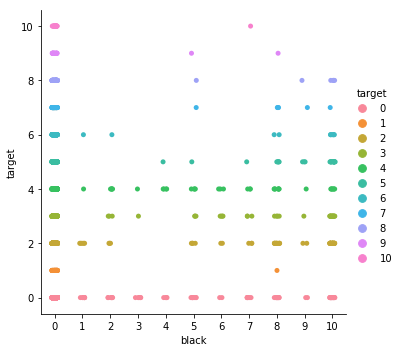

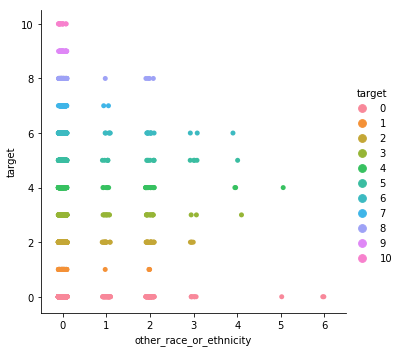

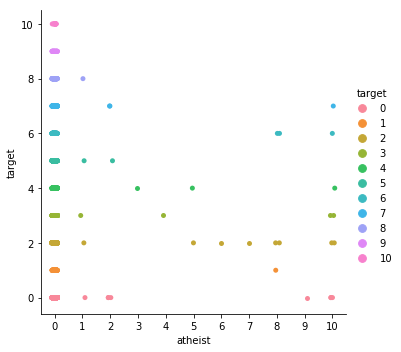

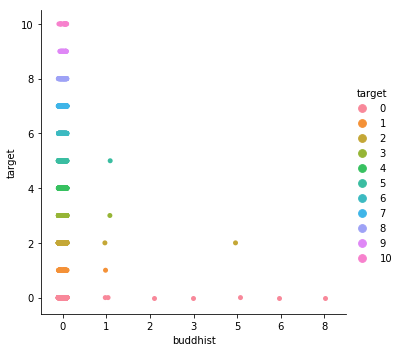

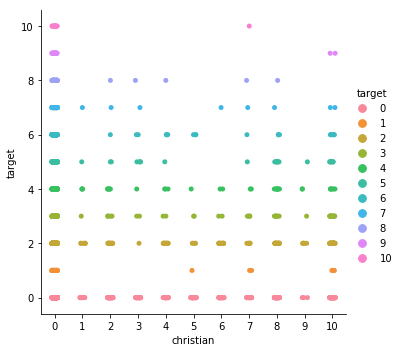

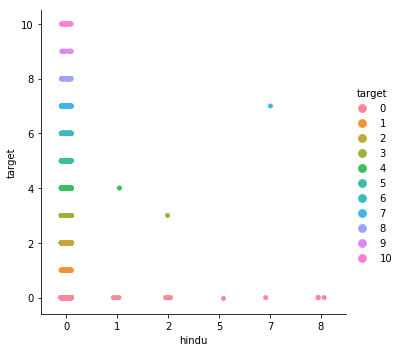

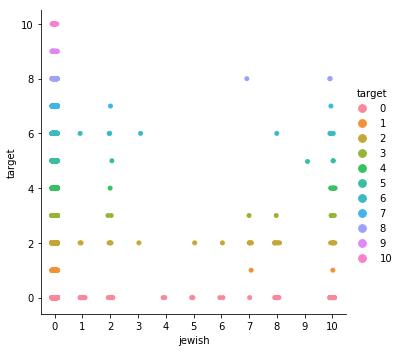

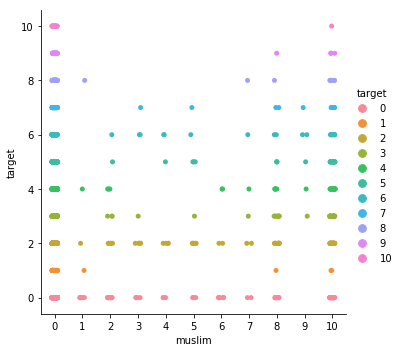

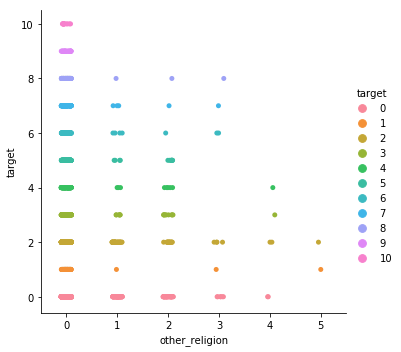

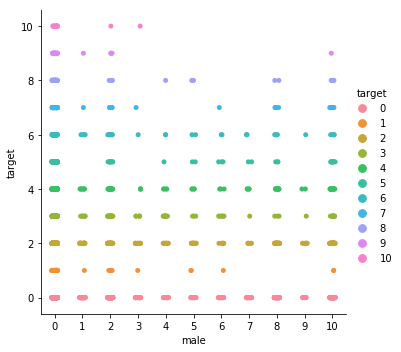

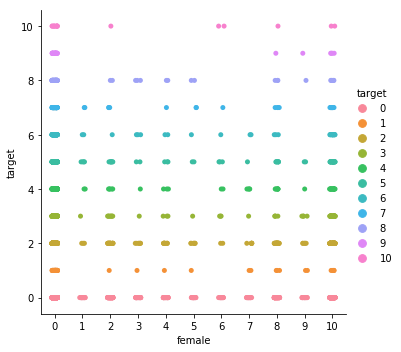

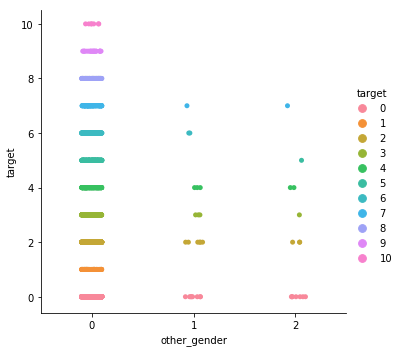

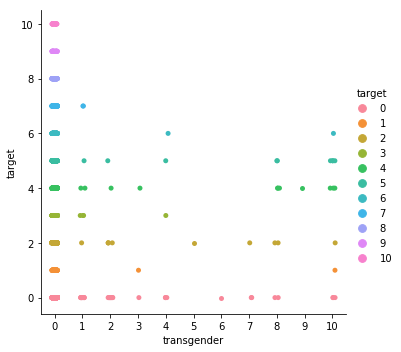

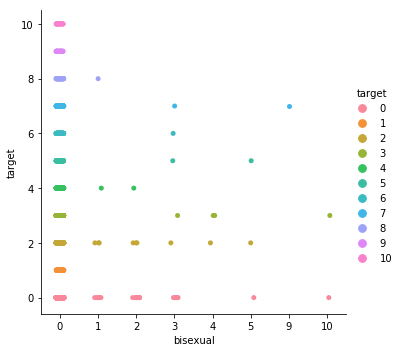

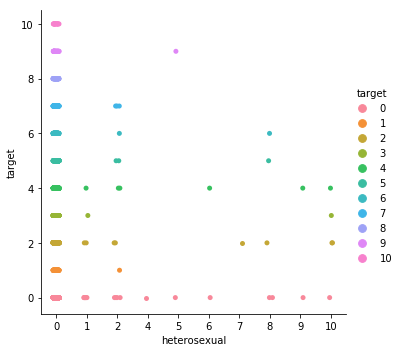

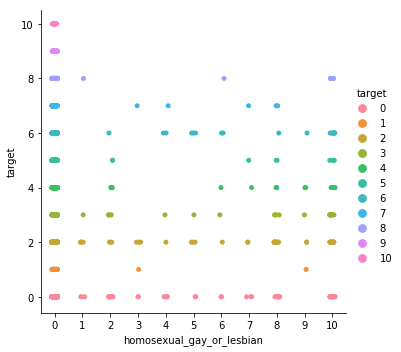

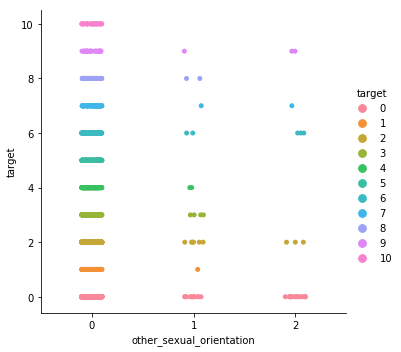

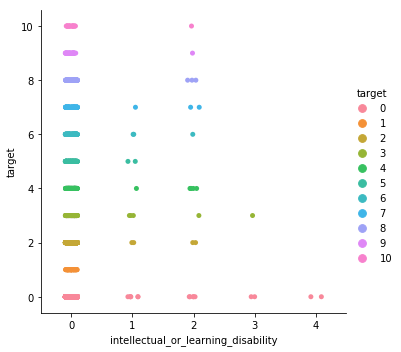

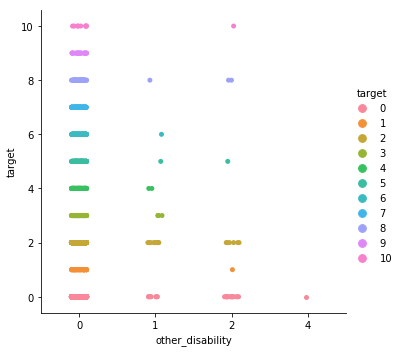

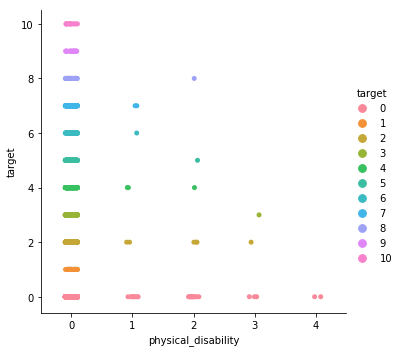

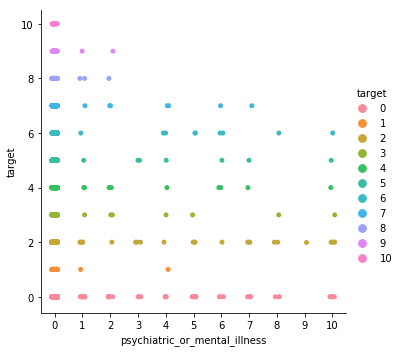

In [16]:
import seaborn as sns

for group, list_identity in dict_group_listidentity.items() :
    for identity in list_identity :
        g = sns.catplot(x=str(identity), y="target", hue="target", data=df_train_identity.sample(5000))

/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


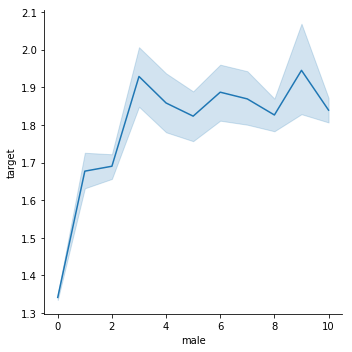

In [18]:
facetGrid = sns.relplot(x='male', y='target',  kind='line', data=df_train_identity)

In [19]:
df_train_identity[['male','target']].target.describe()

count    405130.000000
mean          1.430380
std           2.190608
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          10.000000
Name: target, dtype: float64

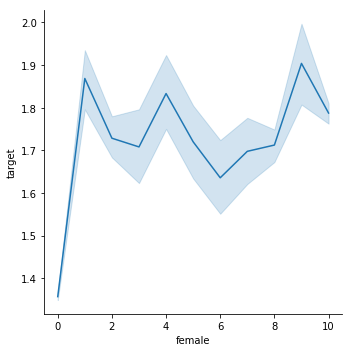

In [20]:
facetGrid = sns.relplot(x='female', y='target',  kind='line', data=df_train_identity)

#### Display of correlation matrix for all identities

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_std_corr = df_train_identity.corr()
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(X_std_corr, annot=False, annot=True)

#### Display of correlation matrix for targeted identities

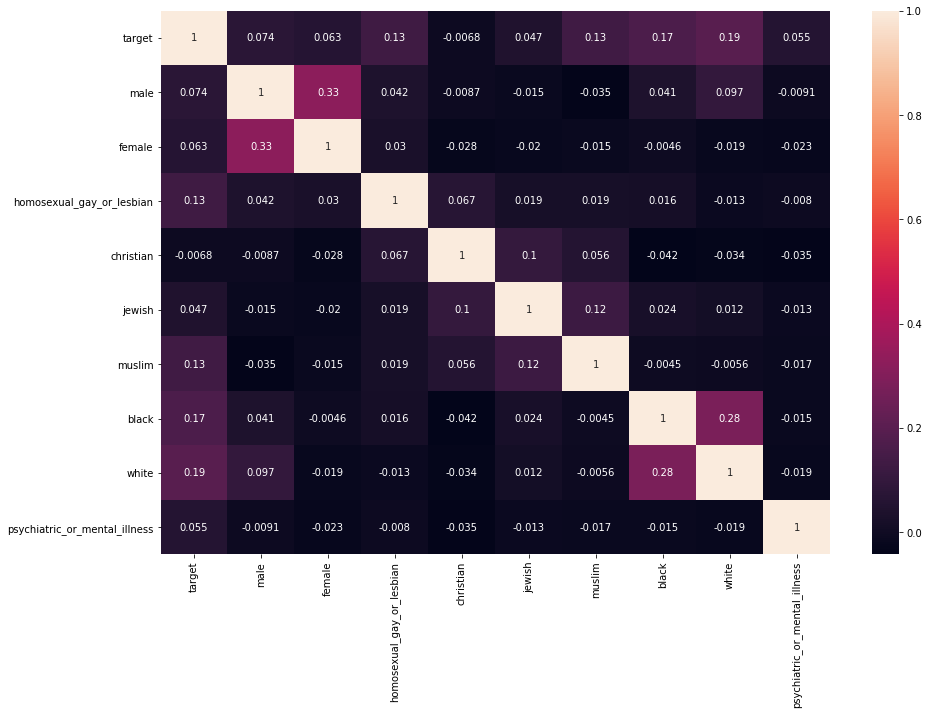

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import p9_util_metrics
list_targeted_identity = ['target']+p9_util_metrics.IDENTITY_COLUMNS
df_train_targeted_identity = df_train[list_targeted_identity]
X_std_corr = df_train_targeted_identity.corr()
f, ax = plt.subplots(figsize=(15, 10))
_z = sns.heatmap(X_std_corr, annot=True)

#### Multivariate analysis for all identities and target 

In [ ]:
df_train_identity.columns

In [196]:
if False :
    df_train_identity_save = df_train_identity.copy(deep=True)

ethnic ['asian', 'latino', 'white', 'black', 'other_race_or_ethnicity']
religious ['atheist', 'buddhist', 'christian', 'hindu', 'jewish', 'muslim', 'other_religion']
genre ['male', 'female', 'other_gender', 'transgender']
sexual_orientation ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
disability ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']


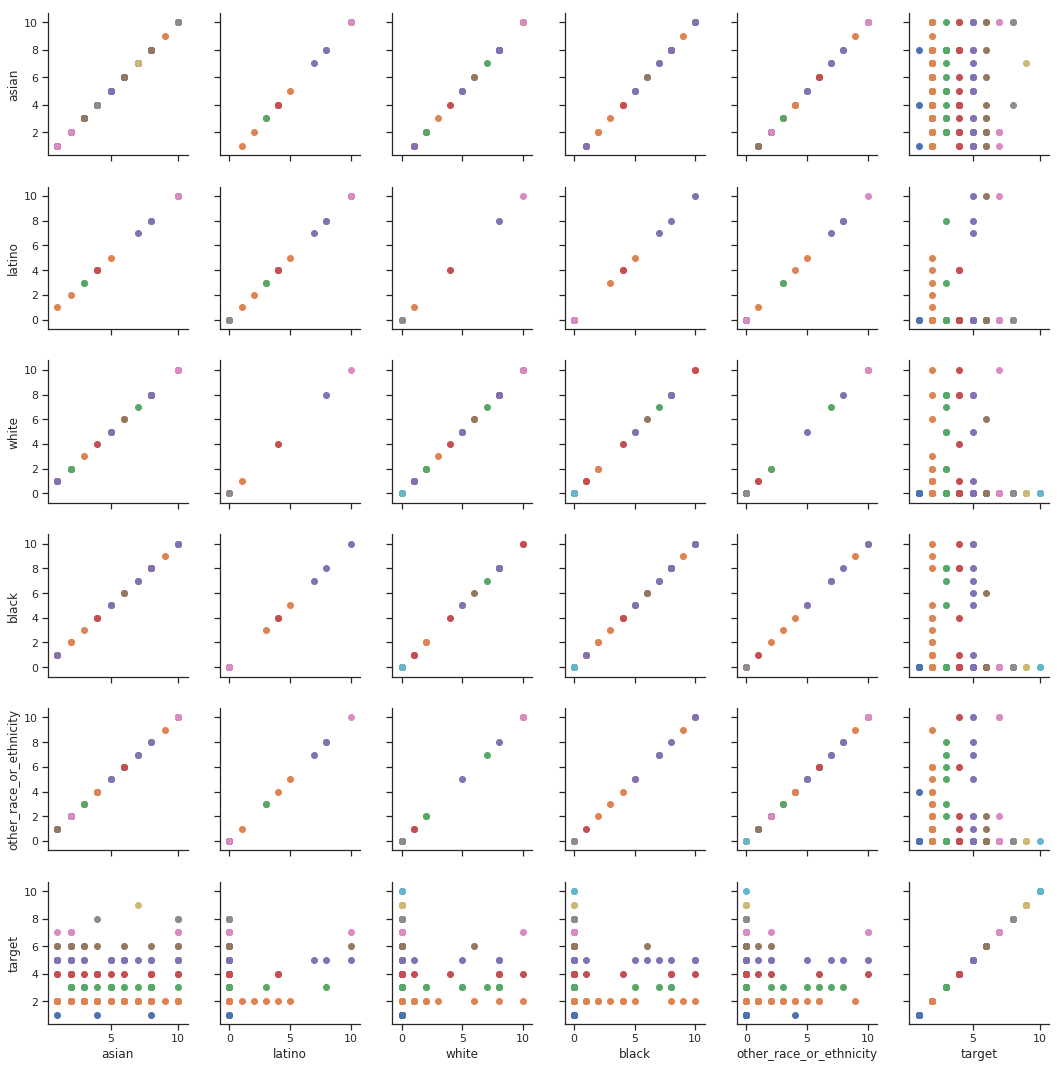

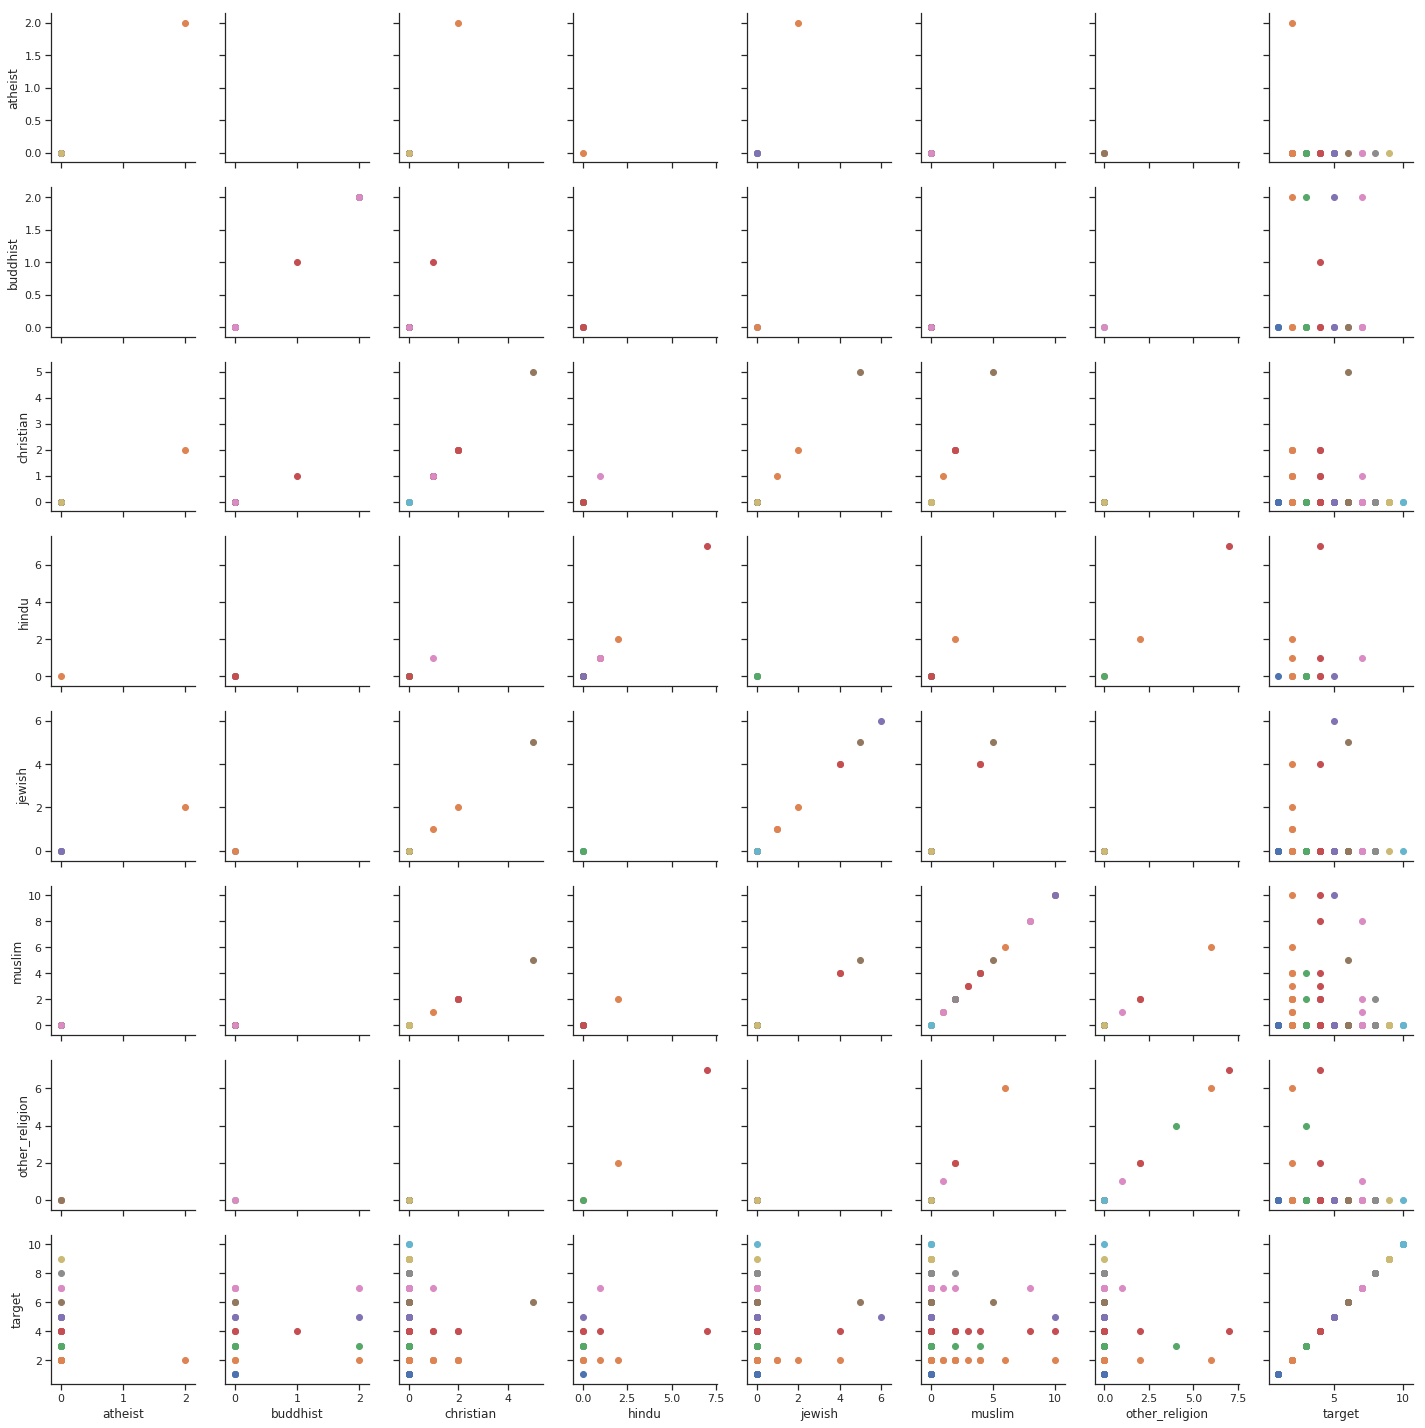

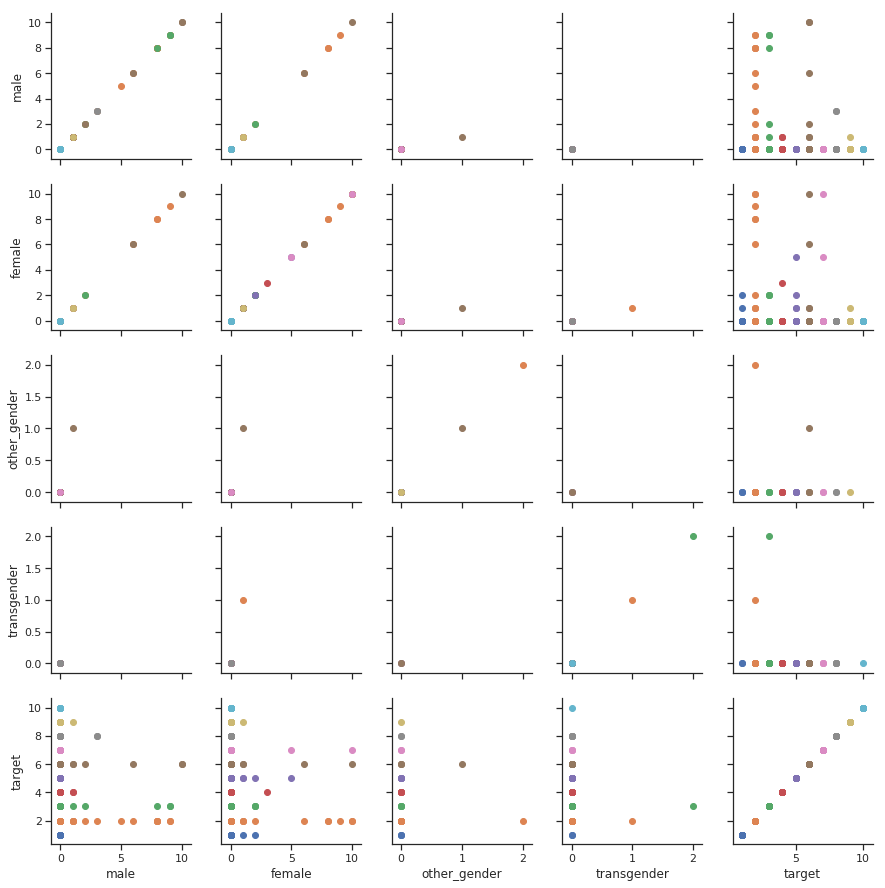

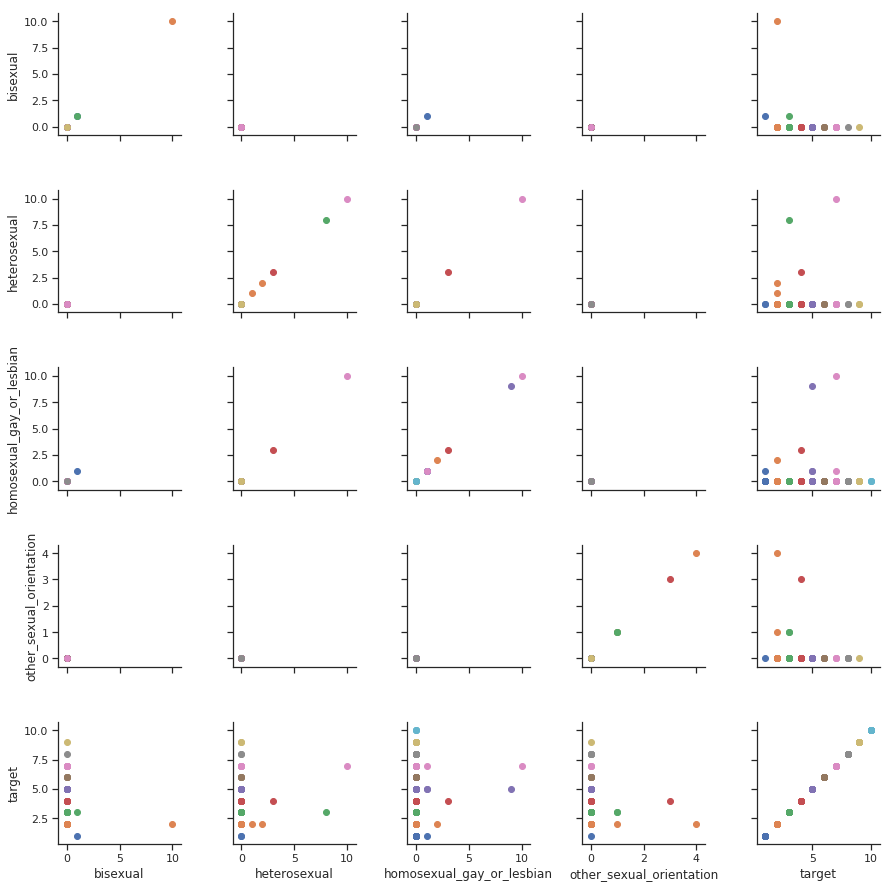

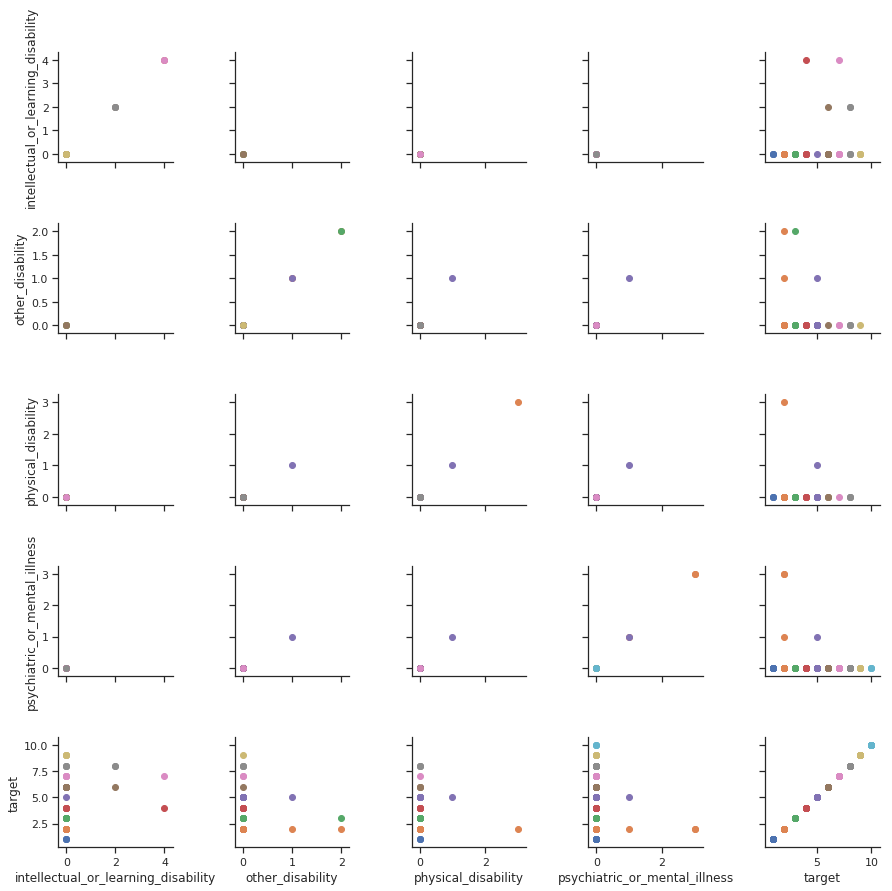

In [232]:
import matplotlib.pyplot as plt

for group, list_identity in dict_group_listidentity.items() :
    print(group,list_identity)
    g = sns.PairGrid(df_train_identity_positive[list_identity+['target']].sample(5000), hue='target')
    g.map(plt.scatter)

#### Multivariate analysis for targeted identities and target 

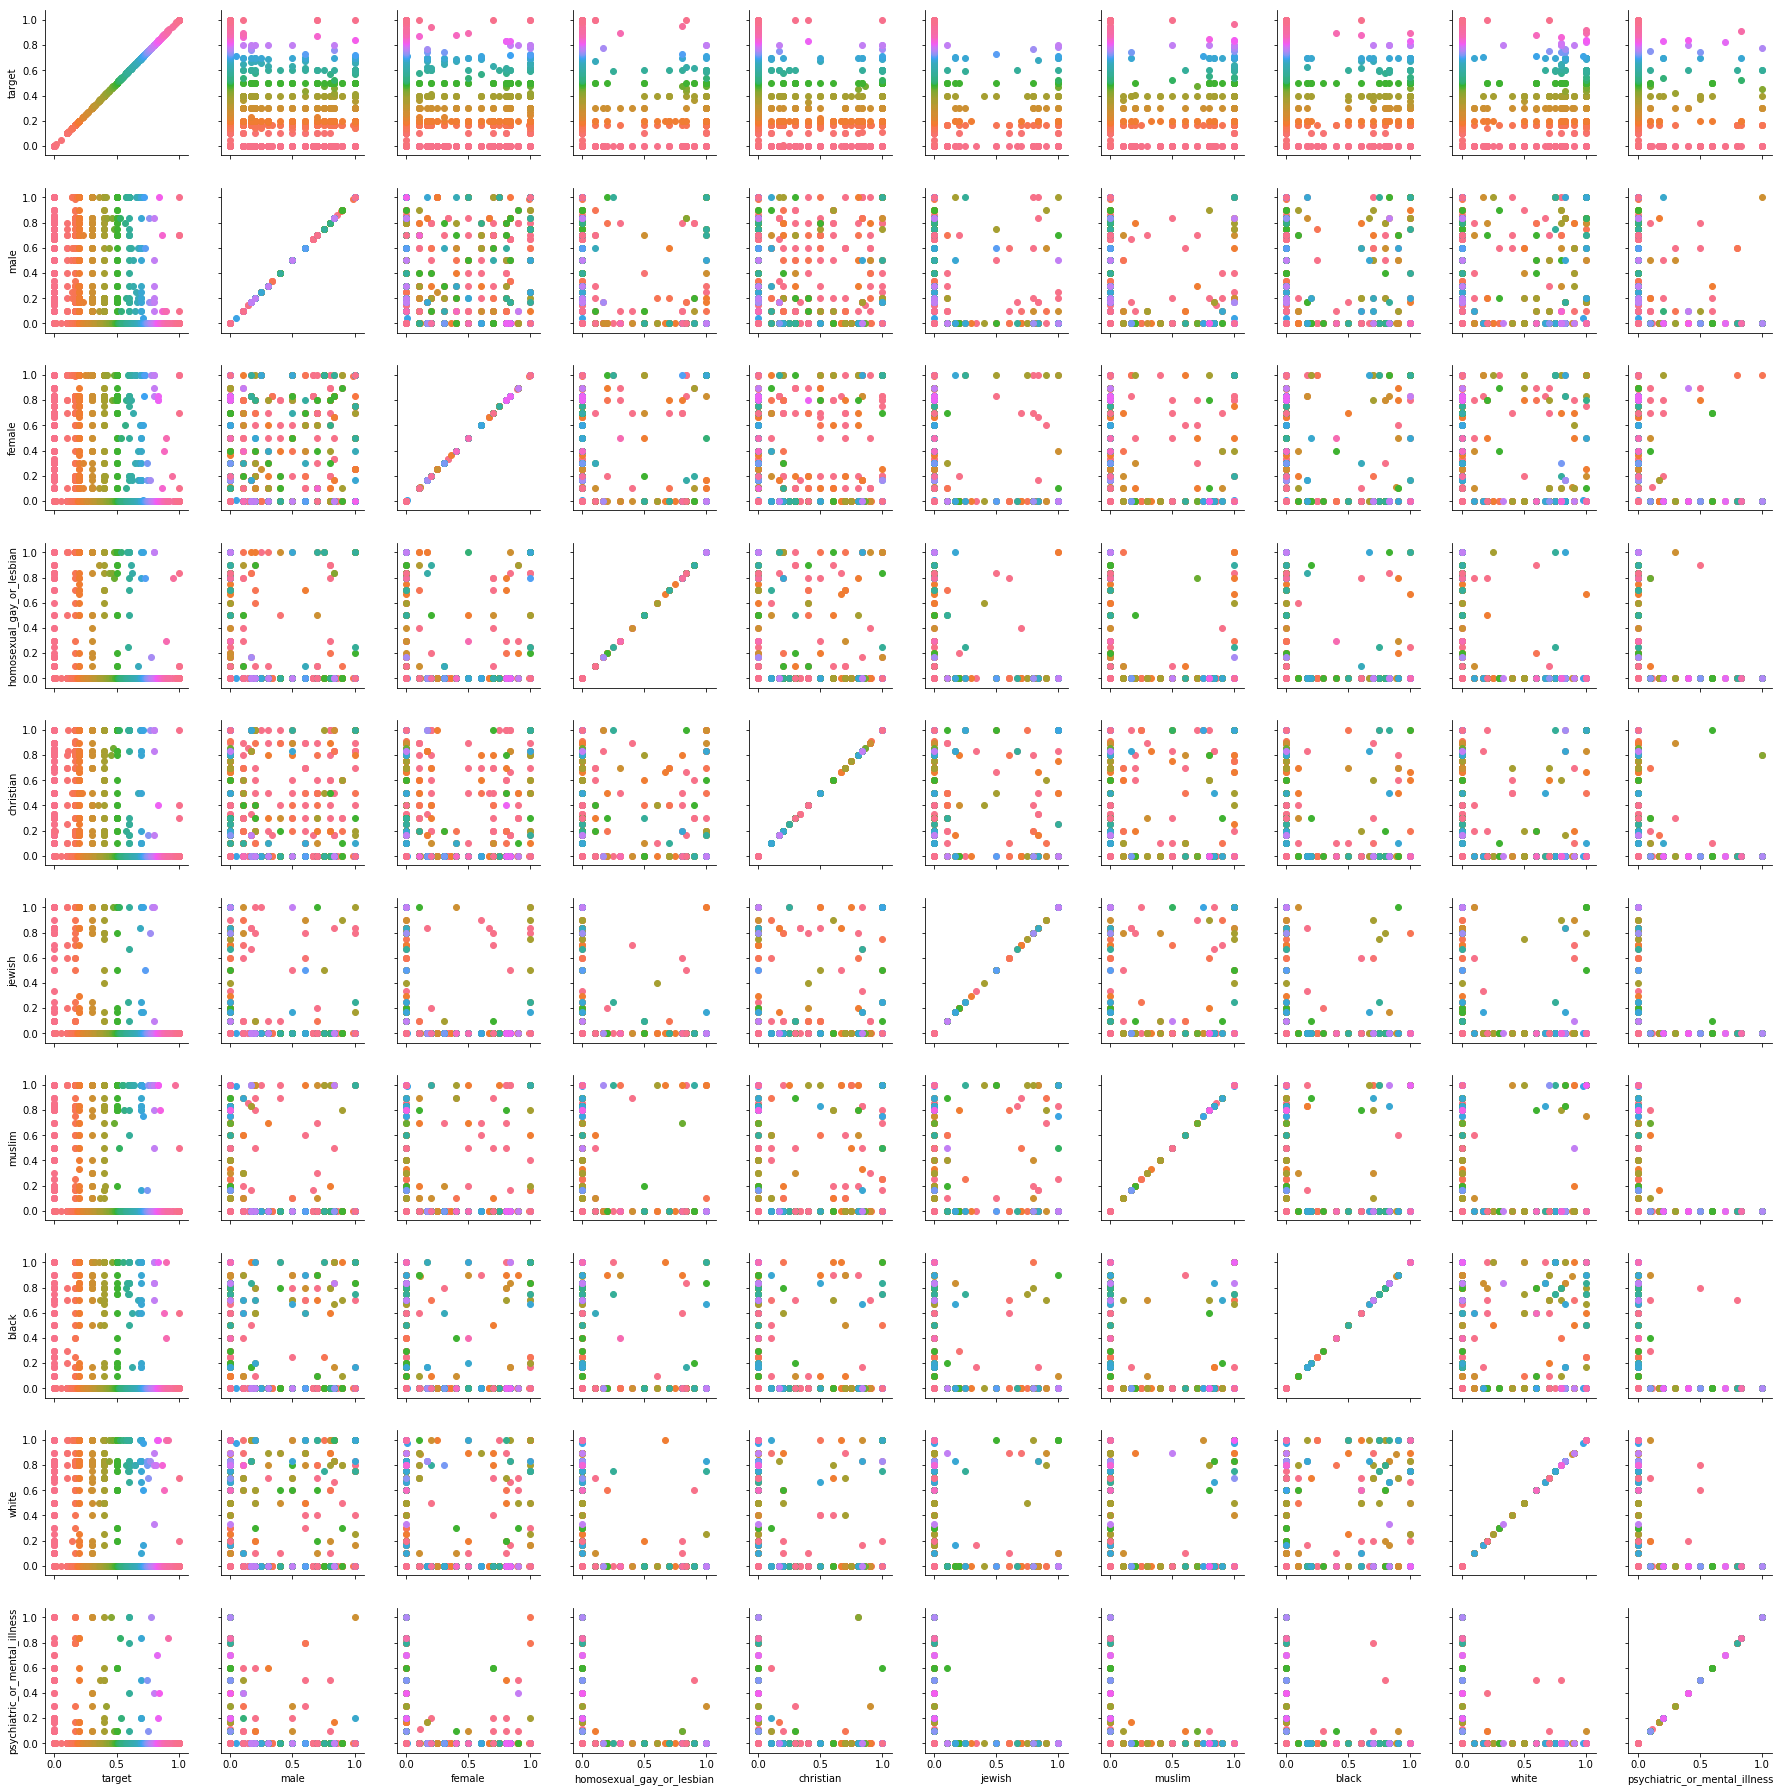

In [112]:
import matplotlib.pyplot as plt

import p9_util_metrics
list_targeted_identity = ['target']+p9_util_metrics.IDENTITY_COLUMNS

g = sns.PairGrid(df_train[list_targeted_identity].dropna().sample(5000), hue='target')
g.map(plt.scatter)

## <font color=blus> 2.2. Filter features without Nan values</font>

In [229]:
[dict_group_listidentity['religious'][0]]

['atheist']

In [9]:
list_colname = [colname for colname, value in ser_train_isna.items() if value == 0]
print("Number of valid columns= {}".format(len(list_colname)))

Number of valid columns= 20


In [10]:
list_colname

['id',
 'target',
 'comment_text',
 'severe_toxicity',
 'obscene',
 'identity_attack',
 'insult',
 'threat',
 'created_date',
 'publication_id',
 'article_id',
 'rating',
 'funny',
 'wow',
 'sad',
 'likes',
 'disagree',
 'sexual_explicit',
 'identity_annotator_count',
 'toxicity_annotator_count']

### <font color=blus>Columns are filtered from dataframe</font>

Columns with Nan values are droped : this leads to having 20 features.

In [11]:
df_train_filtered = df_train[list_colname]

df_train_filtered.shape, df_train.shape

((1804874, 20), (1804874, 45))

## <font color=blus>2.3. Target (toxicity) distribution</font>

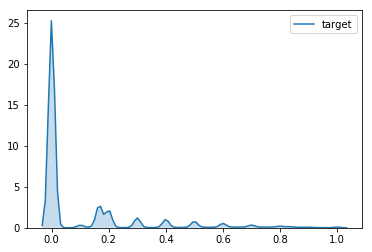

In [126]:
import seaborn as sns
for col in ['target']:
    sns.kdeplot(df_train_filtered[col], shade=True)

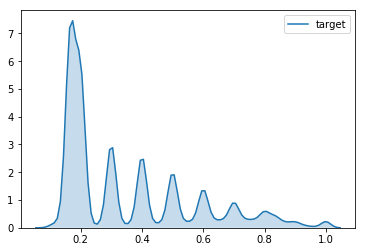

In [189]:
_=sns.kdeplot(ser_text_10pcent, shade=True)

In [226]:
import p9_util

total = df_train_filtered.shape[0]
dict_percent = dict()
verbose = True
for val in range(1,10,1) :
    threshold = val/10
    percent = p9_util.print_col_stat(df_train_filtered, col,threshold, verbose=verbose)
    if verbose :
        print()
    dict_percent[val] = percent
    

Number of texts where toxicity > 0.1 : 524054
Percentage of texts where toxicity > 0.1 : 0.290355

Number of texts where toxicity > 0.2 : 270194
Percentage of texts where toxicity > 0.2 : 0.149702

Number of texts where toxicity > 0.3 : 206991
Percentage of texts where toxicity > 0.3 : 0.114684

Number of texts where toxicity > 0.4 : 151463
Percentage of texts where toxicity > 0.4 : 0.083919

Number of texts where toxicity > 0.5 : 106438
Percentage of texts where toxicity > 0.5 : 0.058973

Number of texts where toxicity > 0.6 : 72235
Percentage of texts where toxicity > 0.6 : 0.040022

Number of texts where toxicity > 0.7 : 45451
Percentage of texts where toxicity > 0.7 : 0.025182

Number of texts where toxicity > 0.8 : 23802
Percentage of texts where toxicity > 0.8 : 0.013188

Number of texts where toxicity > 0.9 : 7517
Percentage of texts where toxicity > 0.9 : 0.004165



In [227]:
pd.Series(dict_percent).min()

0.004164833667059307

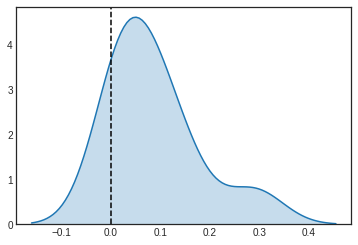

In [228]:
import pandas as pd

_=sns.kdeplot(pd.Series(dict_percent), shade=True)
plt.axvline(0, color="k", linestyle="--");


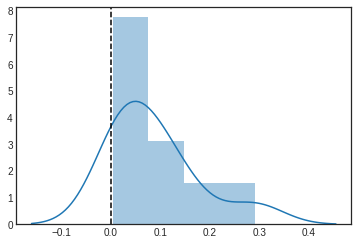

In [229]:
sns.distplot(pd.Series(dict_percent), kde=True);
plt.axvline(0, color="k", linestyle="--");

## <font color=blus>2.4. Extract a test dataset from train file</font>

* Dataset with excluded `Nan` values results in `df_train_filtered` dataframe.
* Features are studied over a fraction of the train dataset (1%) resulting in `df_train_sample`.
* A test dataset is extracted from `df_train_sample` using indexes excluded from `df_train_filtered`. Result is  `df_test_filtered` dataframe.


In [237]:
df_train_sample = df_train_filtered.sample(frac=0.01,random_state=0)
print(df_train_sample.shape)

(18049, 20)


    Get test dataset from indexes into df_train_filtered that do not belongs to train dataset

In [238]:
df_test_filtered = df_train_filtered.query("index!="+str(list(df_train_sample.index)))

    Check consistency after building test dataset and train dataset operations from df_train_filtered.
    It is expected to have equality : Size of train dataset + size of test dataset = size of sample dataset.
    

In [239]:
df_train_filtered.shape[0],df_test_filtered.shape[0] + df_train_sample.shape[0]

(1804874, 1804874)

In [240]:
print(df_train_sample.shape)
print(df_test_filtered.shape)

(18049, 20)
(1786825, 20)


* `df_train_filtered` holds data with excluded `Nan` features values.
* 1% of `df_train_filtered` is used for analysis.
* 30% from `df_test_filtered` is used leading to `df_test_sample`.

In [241]:
# 1% of df_train_filtered is used for analysis.
frac_train = df_train_filtered.shape[0]//100
print("\nNumber rows for analysis train dataset= {}".format(frac_train))

# 30% issued from 1% of df_train_filtered is used for test part analysis.
frac_test = frac_train//3
print("Number rows for analysis test part of dataset= {}".format(frac_test))



Number rows for analysis train dataset= 18048
Number rows for analysis test part of dataset= 6016


In [242]:
df_test_sample = df_test_filtered.sample(n=frac_test,random_state=0)
print(df_test_sample.shape)

(6016, 20)


# <font color=blus>3. Toxicity contributors analysis</font>

* `df_train_part_1` and `df_train_part_2` contain toxicity contributors for analysis.

## <font color=blus>3.1. Multivariate analysis</font>

In [243]:
df_train_part_1 = df_train_sample[['target','severe_toxicity','obscene','identity_attack']]
df_train_part_2 = df_train_sample[['target','insult','threat','sexual_explicit']] 

df_train_part_3 = df_train_sample[['target','funny','wow','sad']]
df_train_part_4 = df_train_sample[['target','likes','disagree']]

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


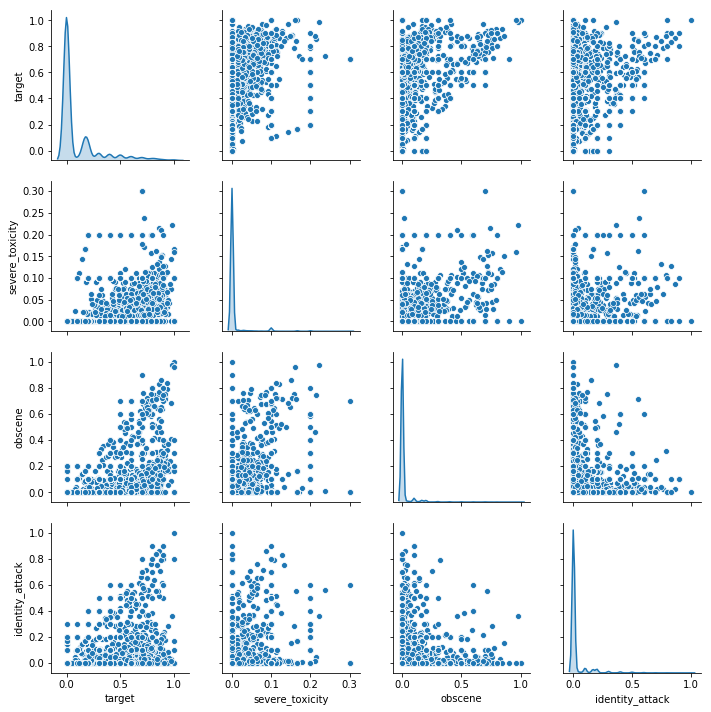

In [13]:
import seaborn as sns
sns.pairplot(df_train_part_1, diag_kind="kde")

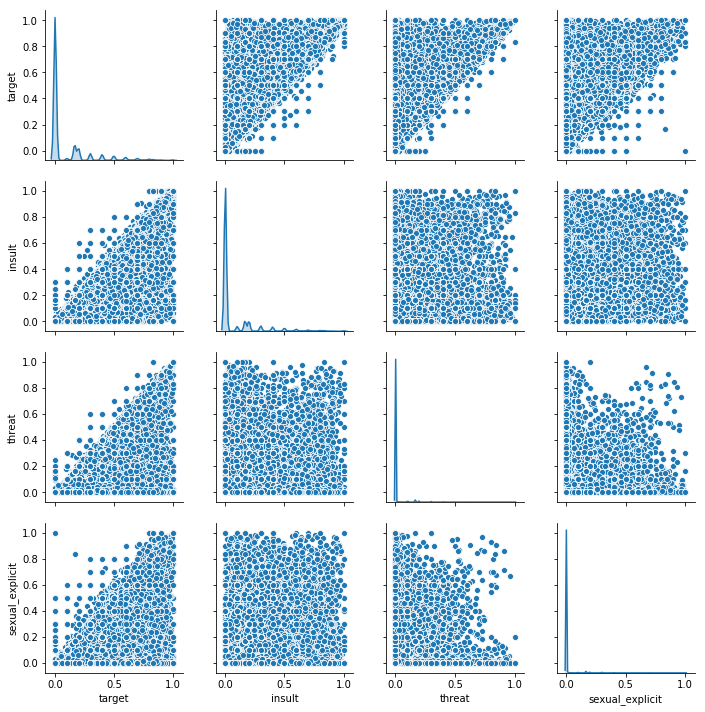

In [47]:
import seaborn as sns
sns.pairplot(df_train_part_2, diag_kind="kde")

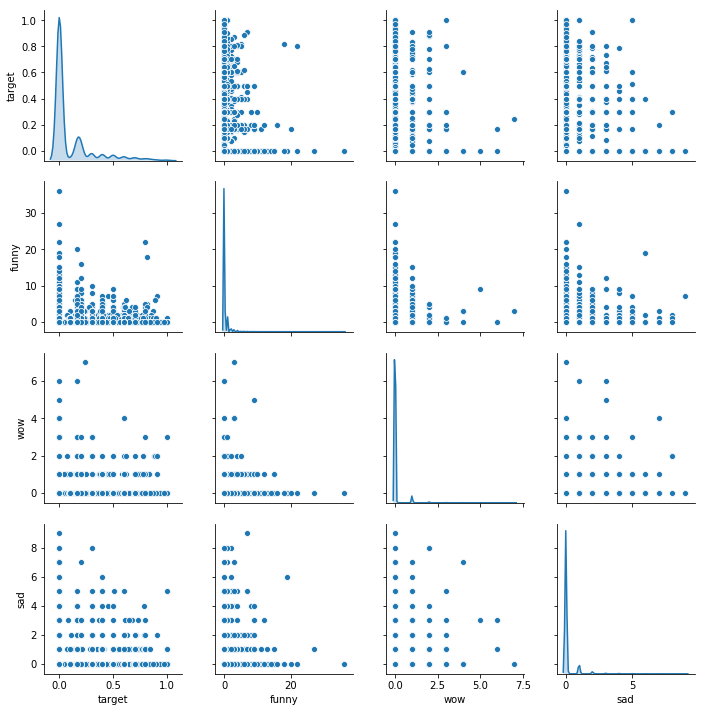

In [256]:
import seaborn as sns
sns.pairplot(df_train_part_3, diag_kind="kde")

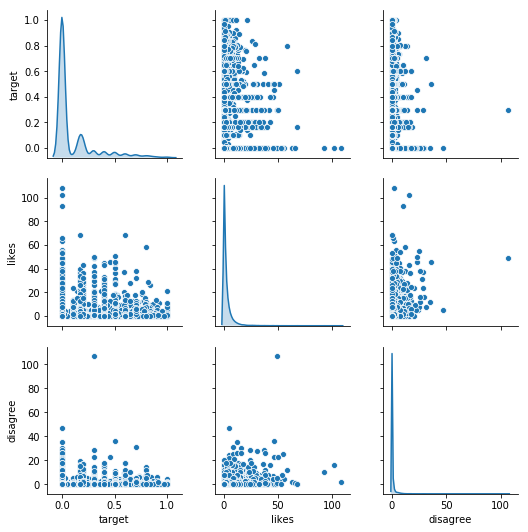

In [257]:
import seaborn as sns
sns.pairplot(df_train_part_4, diag_kind="kde")

## <font color=blus>3.0. ANOVA analysis</font>

In [1]:
import chart_studio as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import researchpy as rp

In [96]:
if False :
    df_train_save = df_train.copy(deep=True)
else : 
    df_train = df_train_save.copy(deep=True)

In [32]:
df_train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [33]:
rp.summary_cont(df_train['target'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,target,1804874.0,0.103017,0.197076,0.000147,0.10273,0.103305


In [113]:
list_toxic_contributor_2=['funny','wow','sad','likes','disagree']
list_toxic_contributor= ['severe_toxicity','obscene','identity_attack','insult','threat','sexual_explicit',]

In [116]:
import p9_util_stats

for toxic_contributor in list_toxic_contributor :
    df_group = df_train[[toxic_contributor,'target']].dropna()
    p9_util_stats.df_anova_group_level(df_group,toxic_contributor,is_verbose=False) 


======= severe_toxicity =======

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified severe_toxicity  with label= 0 : 1700238



*** WARN: group= level_7 : size= 1 <= 6 

*** WARN: group= level_8 : size= 0 <= 6 

*** WARN: group= level_9 : size= 0 <= 6 

*** WARN: group= level_10 : size= 1 <= 6 

Levene test for severe_toxicity
LeveneResult(statistic=nan, pvalue=nan)

Shapiro normality test for severe_toxicity
(0.9240193367004395, 0.008184360340237617)



/home/bangui/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning:

Mean of empty slice.

/home/bangui/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     42.58
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           1.17e-14
Time:                        16:47:55   Log-Likelihood:                 27.733
No. Observations:                  42   AIC:                            -41.47
Df Residuals:                      35   BIC:                            -29.30
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     


======= insult =======

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified insult  with label= 0 : 1350335



Levene test for insult
LeveneResult(statistic=618.9124492333905, pvalue=0.0)

Shapiro normality test for insult
(0.849047839641571, 0.0)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 6.766e+04
Date:                Fri, 01 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:48:05   Log-Likelihood:                 63134.
No. Observations:               59950   AIC:                        -1.262e+05
Df Residuals:                   59939   BIC:                        -1.261e+05
Df Model:                          10                                         
Covariance Type: 

### <font color=blus>3.0.1 ANOVA analysis fo `insult`</font>

    Comments are splitted into groups of levels insults and these groups are labeled:
        * level_0 label : insult == 0.0
        * level_1 label : insult belongs to interval ]0.0,0.1]
        
        ...
        
        * level_9 label : insult belongs to interval ]0.9,1.0]
    
    Let's study if insult levels explains variance of toxicity.
    
    For such study, let's forge the H0 hypothesis : there is no relation between insult and toxicity.

In [34]:
df_train['insult'].describe()

count    1.804874e+06
mean     8.115273e-02
std      1.760657e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.090909e-02
max      1.000000e+00
Name: insult, dtype: float64

    First group is considered with 0.0 values for insult level.
    
    Range of values is [left_limit,right_limit], requiring a dedicated call to df_column_cont2labelRange()

In [35]:
import p9_util

column_name = 'insult'
label_value = 0
left_limit = 0.0
right_limit= 0.0 # not taken into acount with left opertor value fixed to (0,0)
print(left_limit, label_value, right_limit)
df_train = p9_util.df_column_cont2labelRange(df_train, column_name, left_limit, right_limit, label_value, \
                                  t_left_operator=(0,0), t_right_operator=(-1,0)) 

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:


examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.

Using TensorFlow backend.
W1031 15:37:45.571748 140166568576832 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1031 15:37:45.572738 140166568576832 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W1031 15:37:45.586323 140166568576832 deprecation_wrapper.py:119] Fro

0.0 0 0.0

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified insult  with label= 0 : 1350335


/home/bangui/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



    Other groups are processed with range of values : ]left_limit, right_limit] where 
    left_limit is ranged from [0.0,0.9] and right_limit is ranged from [0.1,1.0]

In [36]:
import p9_util

column_name = 'insult'
list_left_limit =  [limit/10 for limit in range(0,10)]
list_right_limit = [limit/10 for limit in range(1,11)]
list_label_value = [label_value/10 for label_value in range(1,11)]
for left_limit, label_value, right_limit in zip(list_left_limit, list_label_value, list_right_limit) :
    print(left_limit, label_value, right_limit)
    df_train = p9_util.df_column_cont2labelRange(df_train, column_name, left_limit, right_limit, label_value, \
                                  t_left_operator=(1,1), t_right_operator=(-1,0)) 

0.0 0.1 0.1

Left operator= (1, 1) Label = 0.1 Right operator=(-1, 0)
Number of modified insult  with label= 0.1 : 45630
0.1 0.2 0.2

Left operator= (1, 1) Label = 0.2 Right operator=(-1, 0)
Number of modified insult  with label= 0.2 : 197299
0.2 0.3 0.3

Left operator= (1, 1) Label = 0.3 Right operator=(-1, 0)
Number of modified insult  with label= 0.3 : 53838
0.3 0.4 0.4

Left operator= (1, 1) Label = 0.4 Right operator=(-1, 0)
Number of modified insult  with label= 0.4 : 43700
0.4 0.5 0.5

Left operator= (1, 1) Label = 0.5 Right operator=(-1, 0)
Number of modified insult  with label= 0.5 : 34185
0.5 0.6 0.6

Left operator= (1, 1) Label = 0.6 Right operator=(-1, 0)
Number of modified insult  with label= 0.6 : 25822
0.6 0.7 0.7

Left operator= (1, 1) Label = 0.7 Right operator=(-1, 0)
Number of modified insult  with label= 0.7 : 20373
0.7 0.8 0.8

Left operator= (1, 1) Label = 0.8 Right operator=(-1, 0)
Number of modified insult  with label= 0.8 : 16098
0.8 0.9 0.9

Left operator= (1,

    Groups are labelized, replacing values 0.X with X.

In [37]:
df_train['insult'] = df_train['insult']*10

dict_replace = {float(label)*10:'level_'+str(int(label*10)) for label in [0,]+list_label_value}

df_train['insult'].replace( dict_replace, inplace= True)
dict_replace

{0.0: 'level_0',
 1.0: 'level_1',
 2.0: 'level_2',
 3.0: 'level_3',
 4.0: 'level_4',
 5.0: 'level_5',
 6.0: 'level_6',
 7.0: 'level_7',
 8.0: 'level_8',
 9.0: 'level_9',
 10.0: 'level_10'}

    Global stats for the dataset are exposed below :

In [40]:
ser_groupby = df_train['target'].groupby(df_train['insult'])
rp.summary_cont(ser_groupby).sort_values(by=['N'])

,N,Mean,SD,SE,95% Conf.,Interval
insult,,,,,,
level_10,5450,0.974893,0.041907,0.000568,0.973780,0.976006
level_9,12144,0.857659,0.040551,0.000368,0.856938,0.858381
level_8,16098,0.781214,0.049601,0.000391,0.780448,0.781980
level_7,20373,0.697096,0.060548,0.000424,0.696265,0.697928
level_6,25822,0.615443,0.073533,0.000458,0.614546,0.616340
level_5,34185,0.531697,0.087899,0.000475,0.530765,0.532628
level_4,43700,0.446543,0.101703,0.000487,0.445589,0.447496
level_1,45630,0.256937,0.143410,0.000671,0.255622,0.258253
level_3,53838,0.361208,0.112043,0.000483,0.360261,0.362154


    Groups are unbalanced in term of size.
    In order to make F-statistic robust, groups are sampled with same size.

In [41]:
min_group_count = rp.summary_cont(ser_groupby).dropna()['N'].min()
min_group_count

5450

In [42]:
list_label_value = [int(10*label_value) for label_value in [0]+list_label_value]
list_label_value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
import p9_util
df_train_insult = p9_util.build_balanced_groups(df_train, list_label_value, min_group_count)


Size of group= level_0 : 1350335
Resampled size of group= level_0 : 5450
Number of items in concatened groups= 5450

Size of group= level_1 : 45630
Resampled size of group= level_1 : 5450
Number of items in concatened groups= 10900

Size of group= level_2 : 197299
Resampled size of group= level_2 : 5450
Number of items in concatened groups= 16350

Size of group= level_3 : 53838
Resampled size of group= level_3 : 5450
Number of items in concatened groups= 21800

Size of group= level_4 : 43700
Resampled size of group= level_4 : 5450
Number of items in concatened groups= 27250

Size of group= level_5 : 34185
Resampled size of group= level_5 : 5450
Number of items in concatened groups= 32700

Size of group= level_6 : 25822
Resampled size of group= level_6 : 5450
Number of items in concatened groups= 38150

Size of group= level_7 : 20373
Resampled size of group= level_7 : 5450
Number of items in concatened groups= 43600

Size of group= level_8 : 16098
Resampled size of group= level_8 : 545

In [44]:
ser_groupby = df_train_insult['target'].groupby(df_train_insult['insult'])
rp.summary_cont(ser_groupby).dropna().sort_values(by=['Mean'])

,N,Mean,SD,SE,95% Conf.,Interval
insult,,,,,,
level_0,5450,0.013603,0.054254,0.000735,0.012162,0.015043
level_2,5450,0.201084,0.100021,0.001355,0.198429,0.203740
level_1,5450,0.258804,0.145244,0.001967,0.254948,0.262661
level_3,5450,0.361936,0.111143,0.001506,0.358985,0.364887
level_4,5450,0.444059,0.100566,0.001362,0.441389,0.446729
level_5,5450,0.531449,0.087714,0.001188,0.529120,0.533778
level_6,5450,0.614630,0.073289,0.000993,0.612684,0.616576
level_7,5450,0.696702,0.060098,0.000814,0.695106,0.698298
level_8,5450,0.781496,0.049296,0.000668,0.780187,0.782805


    It is shown above that target means have some variations from one group of insult level to another.
    
    Higher insult level is, higher comment toxicity is.
    
    Let's check that this differences between means in these groups is significant.
    

#### Levene Test

    For processing ANOVA, homegeneity of variance between differents groups has to be checked.
    This is a strong hypothesis in order to process ANOVA.
    The null hypothsis should not be rejected : 
    H0: all group have same variance

In [45]:
scipy.stats.levene(df_train_insult['target'][df_train_insult['insult'] == 'level_0'],
             df_train_insult['target'][df_train_insult['insult'] == 'level_1'],
             df_train_insult['target'][df_train_insult['insult'] == 'level_2'],
             df_train_insult['target'][df_train_insult['insult'] == 'level_3'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_4'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_5'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_6'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_7'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_8'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_9'],                   
             df_train_insult['target'][df_train_insult['insult'] == 'level_10'],                   
                  )

LeveneResult(statistic=633.8312786522914, pvalue=0.0)

    H0 Levene test is not significant. H0 is rejected; variance is not same between groups.
    
    This lead to consider that ANOVA can't be conducted.

In [24]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C(insult)', data=df_train_insult[['target','insult']]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 6.612e+04
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:31:24   Log-Likelihood:                 62423.
No. Observations:               59950   AIC:                        -1.248e+05
Df Residuals:                   59939   BIC:                        -1.247e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0150      0.001     12.981      0.000       0.013       0.017
C(insult)[T.level_1]      0.2422      0.002    148.011      0.000       0.239       0.245
C(insult)[T.level_10]     0.9599      0.002    586.552      0.000       0.957       0.963
C(insult)[T.level_2]      0.1875      0.002    114.583      0.000       0.184       0.191
C(insult)[T.level_3]      0.3465      0.002    211.734      0.000       0.343       0.350
C(insult)[T.level_4]      0.4295      0.002    262.477      0.000       0.426       0.433
C(insult)[T.level_5]      0.5169      0.002    315.874      0.000       0.514       0.520
C(insult)[T.level_6]      0.5999      0.002    366.580      0.000       0.597       0.603
C(insult)[T.level_7]      0.6821      0.002    416.795      0.000       0.679       0.685
C(insult)[T.level_8]      0.7661      0.002    468.131      0.000       0.763       0.769
C(insult)[T.level_9]      0.8428      0.002    514.991      0.000       0.840       0.846
==============================================================================
Omnibus:                    26175.194   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229588.588
Skew:                           1.885   Prob(JB):                         0.00
Kurtosis:                      11.815   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blus>3.0.1 ANOVA analysis for `male`</font>

    Male is one of the identities group.
    It is relevant to study variance of toxicity considering indentities groups.
    
    Such study may reveal some insight allowng to drive machin learning model.
    
    Groups will be created based on male indice. These groups will be labeled and an ANOVA analysis 
    will be conducted in order to evaluate how such identity group explain toxicity variance.

In [97]:
df_train['target'].describe()

count    1.804874e+06
mean     1.030173e-01
std      1.970757e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e-01
max      1.000000e+00
Name: target, dtype: float64

In [58]:
column_name = 'male'
df_group = df_train[['target',column_name]]
print("Total number of observations= {}".format(len(df_group)))
df_group = df_group.dropna()
print("Total number of cleaned observations= {}".format(len(df_group)))

Total number of observations= 1804874
Total number of cleaned observations= 405130


    First group is considered with 0.0 values for male level.
    
    Range of values is [left_limit,right_limit], requiring a dedicated call to df_column_cont2labelRange()

In [59]:
import p9_util

label_value = 0
left_limit = 0.0
right_limit= 0.0 # not taken into acount with left opertor value fixed to (0,0)
print(left_limit, label_value, right_limit)
df_group = p9_util.df_column_cont2labelRange(df_group, column_name, left_limit, right_limit, label_value, \
                                  t_left_operator=(0,0), t_right_operator=(-1,0)) 

0.0 0 0.0

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified male  with label= 0 : 324951


    Other groups are processed with range of values : ]left_limit, right_limit] where 
    left_limit is ranged from [0.0,0.9] and right_limit is ranged from [0.1,1.0]

In [60]:
import p9_util

list_left_limit =  [limit/10 for limit in range(0,10)]
list_right_limit = [limit/10 for limit in range(1,11)]
list_label_value = [label_value/10 for label_value in range(1,11)]
for left_limit, label_value, right_limit in zip(list_left_limit, list_label_value, list_right_limit) :
    df_group = p9_util.df_column_cont2labelRange(df_group, column_name, left_limit, right_limit, label_value, \
                                  t_left_operator=(1,1), t_right_operator=(-1,0)) 


Left operator= (1, 1) Label = 0.1 Right operator=(-1, 0)
Number of modified male  with label= 0.1 : 9209

Left operator= (1, 1) Label = 0.2 Right operator=(-1, 0)
Number of modified male  with label= 0.2 : 18169

Left operator= (1, 1) Label = 0.3 Right operator=(-1, 0)
Number of modified male  with label= 0.3 : 4834

Left operator= (1, 1) Label = 0.4 Right operator=(-1, 0)
Number of modified male  with label= 0.4 : 3473

Left operator= (1, 1) Label = 0.5 Right operator=(-1, 0)
Number of modified male  with label= 0.5 : 4458

Left operator= (1, 1) Label = 0.6 Right operator=(-1, 0)
Number of modified male  with label= 0.6 : 3758

Left operator= (1, 1) Label = 0.7 Right operator=(-1, 0)
Number of modified male  with label= 0.7 : 4140

Left operator= (1, 1) Label = 0.8 Right operator=(-1, 0)
Number of modified male  with label= 0.8 : 6761

Left operator= (1, 1) Label = 0.9 Right operator=(-1, 0)
Number of modified male  with label= 0.9 : 6344

Left operator= (1, 1) Label = 1.0 Right oper

    Groups are labelized, replacing values 0.X with X.

In [61]:
df_group[column_name] = df_group[column_name]*10

dict_replace = {float(label)*10:'level_'+str(int(label*10)) for label in [0,]+list_label_value}

df_group[column_name].replace( dict_replace, inplace= True)
dict_replace

{0.0: 'level_0',
 1.0: 'level_1',
 2.0: 'level_2',
 3.0: 'level_3',
 4.0: 'level_4',
 5.0: 'level_5',
 6.0: 'level_6',
 7.0: 'level_7',
 8.0: 'level_8',
 9.0: 'level_9',
 10.0: 'level_10'}

    Global stats for the dataset are exposed below :

In [75]:
ser_groupby = df_group['target'].groupby(df_group[column_name])
print(rp.summary_cont(ser_groupby).sort_values(by=['N']))



             N      Mean        SD        SE  95% Conf.  Interval
male                                                             
level_0   3473  0.128607  0.209356  0.003552   0.121643  0.135571
level_1   3473  0.159221  0.221789  0.003763   0.151843  0.166598
level_10  3473  0.177911  0.231865  0.003934   0.170198  0.185624
level_2   3473  0.162636  0.231099  0.003921   0.154949  0.170324
level_3   3473  0.192923  0.244906  0.004156   0.184777  0.201069
level_4   3473  0.187825  0.239593  0.004066   0.179855  0.195795
level_5   3473  0.180081  0.234235  0.003975   0.172289  0.187872
level_6   3473  0.185531  0.235614  0.003998   0.177693  0.193368
level_7   3473  0.181143  0.235475  0.003996   0.173311  0.188976
level_8   3473  0.179206  0.232825  0.003951   0.171462  0.186951
level_9   3473  0.182862  0.232744  0.003949   0.175120  0.190604


    Groups are unbalanced in term of size.
    In order to make F-statistic robust, groups are sampled with same size.

In [63]:
min_group_count = rp.summary_cont(ser_groupby).dropna()['N'].min()
min_group_count

3473

In [64]:
list_label_value = [int(10*label_value) for label_value in [0]+list_label_value]
list_label_value

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [70]:
import p9_util
df_group = p9_util.build_balanced_groups(df_group, column_name, list_label_value, min_group_count)import p9_util
df_group = p9_util.build_balanced_groups(df_group, column_name, list_label_value, min_group_count)


Size of group= level_0 : 324951
Resampled size of group= level_0 : 3473
Number of items in concatened groups= 3473

Size of group= level_1 : 9209
Resampled size of group= level_1 : 3473
Number of items in concatened groups= 6946

Size of group= level_2 : 18169
Resampled size of group= level_2 : 3473
Number of items in concatened groups= 10419

Size of group= level_3 : 4834
Resampled size of group= level_3 : 3473
Number of items in concatened groups= 13892

Size of group= level_4 : 3473
Resampled size of group= level_4 : 3473
Number of items in concatened groups= 17365

Size of group= level_5 : 4458
Resampled size of group= level_5 : 3473
Number of items in concatened groups= 20838

Size of group= level_6 : 3758
Resampled size of group= level_6 : 3473
Number of items in concatened groups= 24311

Size of group= level_7 : 4140
Resampled size of group= level_7 : 3473
Number of items in concatened groups= 27784

Size of group= level_8 : 6761
Resampled size of group= level_8 : 3473
Number o

In [71]:
ser_groupby = df_group['target'].groupby(df_group[column_name])
rp.summary_cont(ser_groupby).dropna().sort_values(by=['Mean'])

,N,Mean,SD,SE,95% Conf.,Interval
male,,,,,,
level_0,3473,0.128607,0.209356,0.003552,0.121643,0.135571
level_1,3473,0.159221,0.221789,0.003763,0.151843,0.166598
level_2,3473,0.162636,0.231099,0.003921,0.154949,0.170324
level_10,3473,0.177911,0.231865,0.003934,0.170198,0.185624
level_8,3473,0.179206,0.232825,0.003951,0.171462,0.186951
level_5,3473,0.180081,0.234235,0.003975,0.172289,0.187872
level_7,3473,0.181143,0.235475,0.003996,0.173311,0.188976
level_9,3473,0.182862,0.232744,0.003949,0.175120,0.190604
level_6,3473,0.185531,0.235614,0.003998,0.177693,0.193368


    It is shown above that target means have some variations from one group of level to another.
    
    There is no evidence of covariancy between groups levels and toxicity.
    
    Let's check if this differences between means in these groups is significant.
    

#### Levene Test

    For processing ANOVA, homegeneity of variance between differents groups has to be checked.
    This is a strong hypothesis in order to process ANOVA.
    The null hypothsis should not be rejected : 
    H0: all group have same variance

In [72]:
scipy.stats.levene(df_group['target'][df_group[column_name] == 'level_0'],
             df_group['target'][df_group[column_name] == 'level_1'],
             df_group['target'][df_group[column_name] == 'level_2'],
             df_group['target'][df_group[column_name] == 'level_3'],                   
             df_group['target'][df_group[column_name] == 'level_4'],                   
             df_group['target'][df_group[column_name] == 'level_5'],                   
             df_group['target'][df_group[column_name] == 'level_6'],                   
             df_group['target'][df_group[column_name] == 'level_7'],                   
             df_group['target'][df_group[column_name] == 'level_8'],                   
             df_group['target'][df_group[column_name] == 'level_9'],                   
             df_group['target'][df_group[column_name] == 'level_10'],                   
                  )

LeveneResult(statistic=24.82341902871177, pvalue=1.8588615260628926e-47)

    H0 Levene test for variance homogeneity significant. H0 is rejected; 
    groups do not have same variance.
    
    This lead to consider that ANOVA to be conducted.

#### ANOVA over `male` groups

In [74]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C('+column_name+')', data=df_group[['target',column_name]]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     21.29
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           4.32e-40
Time:                        16:15:46   Log-Likelihood:                 1622.3
No. Observations:               38203   AIC:                            -3223.
Df Residuals:                   38192   BIC:                            -3128.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1286      0.004     32.676      0.000       0.121       0.136
C(male)[T.level_1]      0.0306      0.006      5.500      0.000       0.020       0.042
C(male)[T.level_10]     0.0493      0.006      8.858      0.000       0.038       0.060
C(male)[T.level_2]      0.0340      0.006      6.114      0.000       0.023       0.045
C(male)[T.level_3]      0.0643      0.006     11.555      0.000       0.053       0.075
C(male)[T.level_4]      0.0592      0.006     10.639      0.000       0.048       0.070
C(male)[T.level_5]      0.0515      0.006      9.248      0.000       0.041       0.062
C(male)[T.level_6]      0.0569      0.006     10.227      0.000       0.046       0.068
C(male)[T.level_7]      0.0525      0.006      9.439      0.000       0.042       0.063
C(male)[T.level_8]      0.0506      0.006      9.091      0.000       0.040       0.062
C(male)[T.level_9]      0.0543      0.006      9.747      0.000       0.043       0.065
==============================================================================
Omnibus:                     7032.098   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11573.504
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                       3.803   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blus>3.0.2 ANOVA analysis for group of identities</font>

In [98]:
import p9_util_metrics
p9_util_metrics.IDENTITY_COLUMNS

['male',
 'female',
 'homosexual_gay_or_lesbian',
 'christian',
 'jewish',
 'muslim',
 'black',
 'white',
 'psychiatric_or_mental_illness']

In [119]:
import p9_util_stats

for group_name in p9_util_metrics.IDENTITY_COLUMNS :
    df_group = df_train[[group_name,'target']].dropna()
    p9_util_stats.df_anova_group_level(df_group,group_name,is_verbose=False) 


======= male =======

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified male  with label= 0 : 324951



Levene test for male
LeveneResult(statistic=22.850566196851286, pvalue=2.4262315535651117e-43)

Shapiro normality test for male
(0.7967860698699951, 0.0)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     18.34
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           5.63e-34
Time:                        17:48:43   Log-Likelihood:                 1605.1
No. Observations:               38203   AIC:                            -3188.
Df Residuals:                   38192   BIC:                            -3094.
Df Model:                          10                                         
Covar

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 level_0  level_1   0.0509  0.001  0.0312  0.0707   True
 level_0 level_10   0.0381  0.001  0.0184  0.0578   True
 level_0  level_2   0.0272  0.001  0.0075   0.047   True
 level_0  level_3   0.0333  0.001  0.0135   0.053   True
 level_0  level_4   0.0457  0.001  0.0259  0.0654   True
 level_0  level_5   0.0326  0.001  0.0128  0.0523   True
 level_0  level_6   0.0249 0.0024  0.0051  0.0446   True
 level_0  level_7   0.0332  0.001  0.0135   0.053   True
 level_0  level_8   0.0308  0.001  0.0111  0.0506   True
 level_0  level_9   0.0358  0.001   0.016  0.0555   True
 level_1 level_10  -0.0128 0.5716 -0.0325  0.0069  False
 level_1  level_2  -0.0237 0.0053 -0.0434  -0.004   True
 level_1  level_3  -0.0177 0.1283 -0.0374  0.0021  False
 level_1  level_4  -0.0053    0.9  -0.025  0.0145  False
 level_1  level_5  -0.0184 0.09


======= christian =======

Left operator= (0, 0) Label = 0 Right operator=(-1, 0)
Number of modified christian  with label= 0 : 343770



Levene test for christian
LeveneResult(statistic=37.34953194576907, pvalue=1.582812145754483e-73)

Shapiro normality test for christian
(0.7724502086639404, 0.0)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     37.86
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           1.36e-74
Time:                        17:48:52   Log-Likelihood:                 5298.3
No. Observations:               24398   AIC:                        -1.057e+04
Df Residuals:                   24387   BIC:                        -1.049e+04
Df Model:                          10                             

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 level_0  level_1   0.0315    0.9 -0.0349 0.0978  False
 level_0 level_10   0.0845 0.0021  0.0181 0.1509   True
 level_0  level_2   0.0412 0.6288 -0.0252 0.1075  False
 level_0  level_3   0.0373  0.745  -0.029 0.1037  False
 level_0  level_4   0.0407 0.6427 -0.0256 0.1071  False
 level_0  level_5   0.0213    0.9 -0.0451 0.0877  False
 level_0  level_6   0.0383 0.7154 -0.0281 0.1047  False
 level_0  level_7   0.0748 0.0129  0.0084 0.1412   True
 level_0  level_8   0.0589 0.1369 -0.0075 0.1252  False
 level_0  level_9   0.0928  0.001  0.0265 0.1592   True
 level_1 level_10   0.0531 0.2621 -0.0133 0.1194  False
 level_1  level_2   0.0097    0.9 -0.0566 0.0761  False
 level_1  level_3   0.0059    0.9 -0.0605 0.0722  False
 level_1  level_4   0.0093    0.9 -0.0571 0.0756  False
 level_1  level_5  -0.0102    0.9 -0.0765 0.0562

Number of modified black  with label= 0 : 385567



Levene test for black
LeveneResult(statistic=19.890163927133806, pvalue=7.793163455143302e-37)

Shapiro normality test for black
(0.9315701723098755, 0.0)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     52.29
Date:                Fri, 01 Nov 2019   Prob (F-statistic):          9.40e-103
Time:                        17:48:59   Log-Likelihood:                 182.20
No. Observations:                8580   AIC:                            -342.4
Df Residuals:                    8569   BIC:                            -264.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
  

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 level_0  level_1   0.0666  0.001  0.0293   0.104   True
 level_0 level_10   0.1805  0.001  0.1431  0.2179   True
 level_0  level_2   0.0557  0.001  0.0183  0.0931   True
 level_0  level_3   0.0692  0.001  0.0318  0.1065   True
 level_0  level_4    0.065  0.001  0.0276  0.1023   True
 level_0  level_5   0.0958  0.001  0.0584  0.1332   True
 level_0  level_6   0.1098  0.001  0.0724  0.1471   True
 level_0  level_7   0.1341  0.001  0.0967  0.1715   True
 level_0  level_8   0.1648  0.001  0.1274  0.2022   True
 level_0  level_9   0.1748  0.001  0.1375  0.2122   True
 level_1 level_10   0.1139  0.001  0.0765  0.1512   True
 level_1  level_2  -0.0109    0.9 -0.0483  0.0265  False
 level_1  level_3   0.0025    0.9 -0.0348  0.0399  False
 level_1  level_4  -0.0017    0.9  -0.039  0.0357  False
 level_1  level_5   0.0292 0.29

### <font color=blus>3.0.3 ANOVA for group of toxicity contributors</font>

In [ ]:
import p9_util_metrics


### target and sexual_explicit

In [98]:
import p9_util
# Assign value 
#  * 0 if df_train['insult'] <=  threshold
#  * 1 if df_train['insult'] > threshold 
threshold = 0.5
direction = 1

df_train['sexual_explicit'] = p9_util.multivalue2_binary(df_train['sexual_explicit'], threshold, direction, value_true=1, value_false=0) 

In [100]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C(sexual_explicit)', data=df_train[['target','sexual_explicit']]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 3.851e+04
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:32:26   Log-Likelihood:             3.8947e+05
No. Observations:             1804874   AIC:                        -7.789e+05
Df Residuals:                 1804872   BIC:                        -7.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1016      0.000    698.795      0.000       0.101       0.102
C(sexual_explicit)[T.1]     0.5598      0.003    196.247      0.000       0.554       0.565
==============================================================================
Omnibus:                   776560.086   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3006609.820
Skew:                           2.210   Prob(JB):                         0.00
Kurtosis:                       7.522   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### threat and sexual_explicit

In [99]:
from statsmodels.formula.api import ols
model_name = ols('threat ~ C(sexual_explicit)', data=df_train[['threat','sexual_explicit']]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 threat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2150.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:29:29   Log-Likelihood:             2.8680e+06
No. Observations:             1804874   AIC:                        -5.736e+06
Df Residuals:                 1804872   BIC:                        -5.736e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0092   3.68e-05    250.570      0.000       0.009       0.009
C(sexual_explicit)[T.1]     0.0335      0.001     46.372      0.000       0.032       0.035
==============================================================================
Omnibus:                  2494490.027   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        648918867.777
Skew:                           8.181   Prob(JB):                         0.00
Kurtosis:                      94.439   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
ser_groupby = df_train['target'].groupby(df_train['insult'])
rp.summary_cont(ser_groupby).dropna()

,N,Mean,SD,SE,95% Conf.,Interval
insult,,,,,,
insult,450705,0.369282,0.225258,0.000336,0.368624,0.369940
safe,1354169,0.014397,0.058544,0.000050,0.014298,0.014496


    Here under, it is tested how insult parameter explains variance for toxicity.
    

In [84]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C(insult)', data=df_train[['target','insult']].sample(100)).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     195.3
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           4.59e-25
Time:                        00:10:07   Log-Likelihood:                 72.802
No. Observations:                 100   AIC:                            -141.6
Df Residuals:                      98   BIC:                            -136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3687      0.022     16.532      0.000       0.324       0.413
C(insult)[T.safe]    -0.3674      0.026    -13.975      0.000      -0.420      -0.315
==============================================================================
Omnibus:                       56.097   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.462
Skew:                           1.747   Prob(JB):                     2.30e-63
Kurtosis:                      10.552   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    F-statistics value 1.521e+05, is very high. It means that difference of means between insult groups and safe groups is significant considering toxicity.
    
    p-values also shows that there is a significative difference 
    between comments with insult and comments without, considering toxicity.
    
    Insult indexe, considered as effective with a threshold value of 0.5, has a relation with 
    variability of toxicity comments.
    
    Note that the proportion of variance of target explained by insult is 0.542. This proportion is significative.
    
    This let us conclude that other factors do explain variance.

### Identities vs target ANOVA

In [101]:
import p9_util_metrics
p9_util_metrics.IDENTITY_COLUMNS

['male',
 'female',
 'homosexual_gay_or_lesbian',
 'christian',
 'jewish',
 'muslim',
 'black',
 'white',
 'psychiatric_or_mental_illness']

In [102]:
df_train['male'].describe()

count    405130.000000
mean          0.108687
std           0.267894
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: male, dtype: float64

In [103]:
import p9_util
# Assign value 
#  * 0 if df_train['insult'] <=  threshold
#  * 1 if df_train['insult'] > threshold 
threshold = 0.5
direction = 1

df_train['male'] = p9_util.multivalue2_binary(df_train['male'], threshold, direction, value_true=1, value_false=0) 

In [104]:
df_train['male'].replace({0: 'no_male', 1: 'male'}, inplace= True)

In [105]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C(male)', data=df_train[['target','male']]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:48:18   Log-Likelihood:             3.7402e+05
No. Observations:             1804874   AIC:                        -7.480e+05
Df Residuals:                 1804872   BIC:                        -7.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1813      0.001    194.453      0.000       0.180       0.183
C(male)[T.no_male]    -0.0803      0.001    -85.036      0.000      -0.082      -0.078
==============================================================================
Omnibus:                   769707.406   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2932738.129
Skew:                           2.195   Prob(JB):                         0.00
Kurtosis:                       7.440   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
anova_table = sm.stats.anova_lm(model_name, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(male),1.0,279.730659,279.730659,7231.193661,0.0
Residual,1804872.0,69819.459586,0.038684,NaN,NaN


In [107]:
import p9_util
# Assign value 
#  * 0 if df_train['insult'] <=  threshold
#  * 1 if df_train['insult'] > threshold 
threshold = 0.5
direction = 1

df_train['psychiatric_or_mental_illness'] = p9_util.multivalue2_binary(df_train['psychiatric_or_mental_illness'], threshold, direction, value_true=1, value_false=0) 

In [108]:
df_train['psychiatric_or_mental_illness'].replace({0: 'no_psy', 1: 'psy'}, inplace= True)

In [109]:
from statsmodels.formula.api import ols
model_name = ols('target ~ C(psychiatric_or_mental_illness)', data=df_train[['target','psychiatric_or_mental_illness']]).fit()

model_name.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1953.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:52:31   Log-Likelihood:             3.7139e+05
No. Observations:             1804874   AIC:                        -7.428e+05
Df Residuals:                 1804872   BIC:                        -7.427e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.1027      0.000    699.391      0.000       0.102       0.103
C(psychiatric_or_mental_illness)[T.psy]     0.1247      0.003     44.198      0.000       0.119       0.130
==============================================================================
Omnibus:                   768742.981   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2914638.845
Skew:                           2.195   Prob(JB):                         0.00
Kurtosis:                       7.414   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color=blus>3.1. Feature engineering : `new_feature`</font>

Combinaison of features that contribute to toxicity detection and forming `new_feature` shows that rectangle-triangle is replaced with a shape in which linear correlation between `target` and `new_feature` is more obvious.

All features does not contribute with the same weight to the toxicity.

`new_feature` is then formed from weights issued from correlations matrix.


### <font color=blus>Features to toxicity contribution are filtered</font>

* Result lies on dataframe `df_train_sample`

In [103]:
list_feature_excluded = ['comment_text','created_date','publication_id','article_id','identity_annotator_count','toxicity_annotator_count']
list_feature_excluded +=['rating','funny','wow','sad','likes','disagree']
list_feature_excluded

['comment_text',
 'created_date',
 'publication_id',
 'article_id',
 'identity_annotator_count',
 'toxicity_annotator_count',
 'rating',
 'funny',
 'wow',
 'sad',
 'likes',
 'disagree']

In [104]:
list_feature = df_train_sample.columns
list_feature = list_feature[1:-1]
list_feature = [feature for feature in list_feature if feature not in list_feature_excluded ]
list_feature

['target',
 'severe_toxicity',
 'obscene',
 'identity_attack',
 'insult',
 'threat',
 'sexual_explicit']

In [271]:
df = df_train_sample[list_feature]
res = df.query('target>0.3').sample(2).head()
print(df_train_sample['comment_text'].loc[res.index[0]])
print()
print(df_train_sample['comment_text'].loc[res.index[1]])
res

So why not worry about the scandal of heterosexual priests?  Why not act against the "straight" sexually active priests and hierarchs with families or girlfriends on the side?  Why not act against the "straight" priests and hierarchs who abuse or hide abusers?  There's been a helluva lot more scandal from that, despite some people's efforts to portray it as a gay issue.  The claim of protecting the Church by keeping gay men out of the seminaries is, bluntly, hypocrisy.

Pathetic. Is that the best the Globe can do?
A drop of (so far) less than 1% is somehow relevant to judge Trump?

How many 1% drops did we have during the Obama years?  

When the market goes down big time, AND IT WILL, it will have little to do with Trump, but with China, Fed policies of the past decade, and a war somewhere that probably is mostly due to Obama's weak leadership in foreign affairs.

By spewing this kind of nonsense, the media enfeeble themselves  and take themselves out of the conversation of serious pe

,target,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
357023,0.400000,0.1,0.100000,0.2,0.300000,0.0,0.0
555712,0.833333,0.0,0.166667,0.0,0.833333,0.0,0.0


In [272]:
len("I only got the email notification which said something about Smug. I believe in full disclosure - just so all our presuppositions are on the table. Yes I am a white, Christian, conservative male - just the type you most likely spent most of your years persecuting. You use a clearly isolated incident with the EPD, and ignore the hundreds of thousands of good things they do. Pretty pathetic if you ask me, and the taxpayers are paying you for this as well. SAD")

461

In [105]:
df_train_sample = df_train_sample[list_feature]

###  <font color=blus>Feature engineering : building `new_feature`</font>

* Features such as : 
    * `threat, insult, sexual_explicit, identity_attack, obscene, severe_toxicity` 
  are combined all-together forming to a new feature.

* Those features do contribute to toxicity text detection.

* Those features draw a rectangle-triangle compared with `target` column.

* A linear correlation relation is suspected between those features and ̀`target`. 

In a first step, all weights are fixed to 1. It is supposed that all those features have the same weight considering target value.

Weights are handled into `ser_weight_unit` Series.


In [106]:
import numpy as np
import pandas as pd

df_train_sample.shape
arr_unit = np.array([1. for value in list_feature])
ser_weight_unit =pd.Series( arr_unit, index=list_feature)
print(ser_weight_unit)

target             1.0
severe_toxicity    1.0
obscene            1.0
identity_attack    1.0
insult             1.0
threat             1.0
sexual_explicit    1.0
dtype: float64


* `df_train_sample` is added with a new column named `new_feature`. This new feature is the combination of all other columns with weight values to 1.

In [112]:
import p9_util

df_train_sample = p9_util.df_weight_newFeature(df_train_sample, ser_weight_unit, list_feature, 'new_feature')
print()
print(df_train_sample.columns)
print(df_train_sample.shape)

target 1.0
severe_toxicity 1.0
obscene 1.0
identity_attack 1.0
insult 1.0
threat 1.0
sexual_explicit 1.0

Index(['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit', 'new_feature'],
      dtype='object')
(18049, 8)


In [108]:
df_train_sample['new_feature'].max()

1.0


Pearson coefficient between (target,new_feature) = 0.9772645985025511


/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


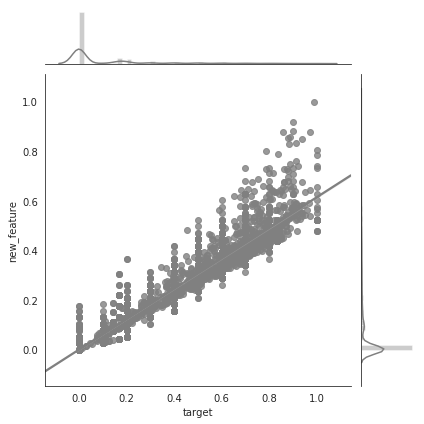

In [109]:
import scipy

import p3_util_plot

var1 = 'target'
var2 = 'new_feature'

pearson = scipy.stats.pearsonr(df_train_sample[var1],df_train_sample[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))

#p3_util_plot.df_sns_joint_plot(df_train_sample, var1, var2, parameter_kind='reg', parameter_color='grey')
p3_util_plot.df_sns_joint_plot(df_train_sample, var1, var2, parameter_color='grey')


Displaying density distributions give additional interpretation.

Features are correlated strongly in interval `[0.0 , 0.2]`


Pearson coefficient between (target,new_feature) = 0.9772645985025511


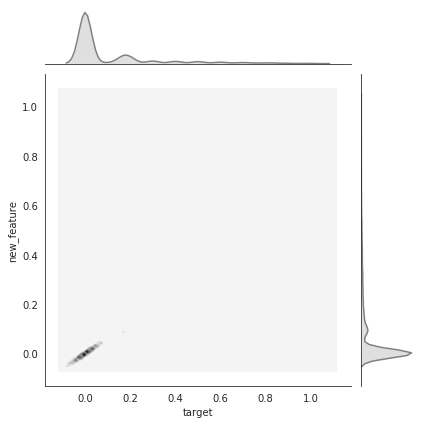

In [26]:
import scipy
import p3_util_plot
var1 = 'target'
var2 = 'new_feature'

pearson = scipy.stats.pearsonr(df_train_sample[var1],df_train_sample[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))

p3_util_plot.df_sns_joint_plot(df_train_sample, var1, var2, parameter_kind='kde', parameter_color='grey')

Then let's plot target values >0.2 and target values <= 0.2

This is achieved applying query to `df_train_sample` dataframe.

In [29]:
select="target <= 0.2"
df_train_sample_select_0 = df_train_sample.query(select, inplace=False)

select="target > 0.2"
df_train_sample_select_1 = df_train_sample.query(select, inplace=False)



Pearson coefficient between (target,new_feature) = 0.929778393032554


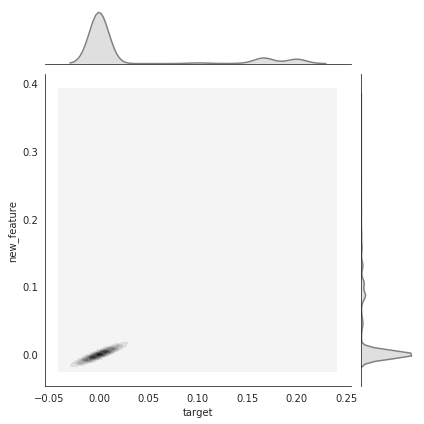

In [30]:
import scipy
import p3_util

pearson = scipy.stats.pearsonr(df_train_sample_select_0[var1],df_train_sample_select_0[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))
p3_util_plot.df_sns_joint_plot(df_train_sample_select_0, var1, var2, parameter_kind='kde', parameter_color='grey')


Pearson coefficient between (target,new_feature) = 0.9035771413019859


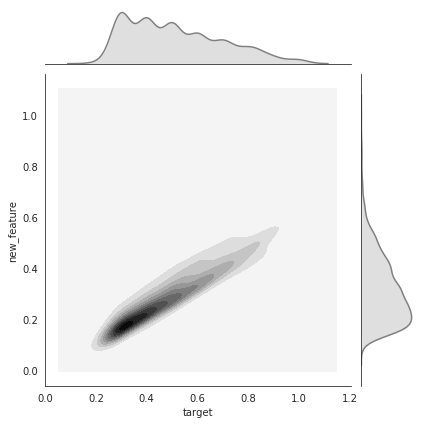

In [31]:
import scipy
import p3_util

pearson = scipy.stats.pearsonr(df_train_sample_select_1[var1],df_train_sample_select_1[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))
p3_util_plot.df_sns_joint_plot(df_train_sample_select_1, var1, var2, parameter_kind='kde', parameter_color='grey')

## <font color=blus>Weighting features with matrix correlations</font>

In [32]:
df_train_sample.max()

target             1.0
severe_toxicity    0.3
obscene            1.0
identity_attack    1.0
insult             1.0
threat             1.0
sexual_explicit    1.0
new_feature        1.0
dtype: float64

In [33]:
if 'new_feature' in df_train_sample :
    del(df_train_sample['new_feature'])

In [34]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
print(std_scaler.fit(df_train_sample))

X_std = std_scaler.transform(df_train_sample)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [35]:
df_train_sample.columns

Index(['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit'],
      dtype='object')

In [36]:
df_train_sample_std = pd.DataFrame(X_std, columns=df_train_sample.columns)

In [37]:
df_train_sample_std.head(3)

,target,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,-0.527767,-0.209535,-0.215539,-0.288058,-0.466598,-0.190872,-0.136735
1,-0.527767,-0.209535,-0.215539,-0.288058,-0.466598,-0.190872,-0.136735
2,-0.527767,-0.209535,-0.215539,-0.288058,-0.466598,-0.190872,-0.136735


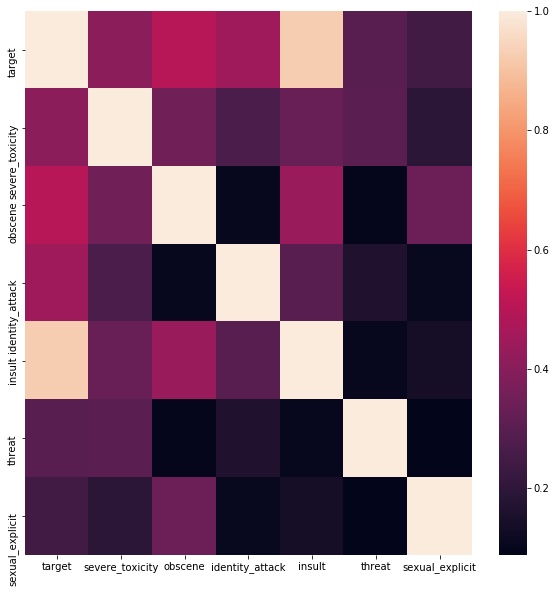

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_std_corr = df_train_sample_std.corr()
f, ax = plt.subplots(figsize=(10, 10))
_z = sns.heatmap(X_std_corr, annot=False)

In [45]:
X_std_corr[:]

,target,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
target,1.000000,0.405802,0.500494,0.448081,0.925399,0.296270,0.244588
severe_toxicity,0.405802,1.000000,0.352787,0.267649,0.333349,0.303908,0.193290
obscene,0.500494,0.352787,1.000000,0.104657,0.438020,0.096228,0.338451
identity_attack,0.448081,0.267649,0.104657,1.000000,0.295346,0.164630,0.107064
insult,0.925399,0.333349,0.438020,0.295346,1.000000,0.104562,0.139459
threat,0.296270,0.303908,0.096228,0.164630,0.104562,1.000000,0.087756
sexual_explicit,0.244588,0.193290,0.338451,0.107064,0.139459,0.087756,1.000000


#### Weights assignement for building `new_feature`

Weights are issued from correlation matrix.

In [49]:
list_feature

['target',
 'severe_toxicity',
 'obscene',
 'identity_attack',
 'insult',
 'threat',
 'sexual_explicit']

In [50]:
X_std_corr['target']

target             1.000000
severe_toxicity    0.405802
obscene            0.500494
identity_attack    0.448081
insult             0.925399
threat             0.296270
sexual_explicit    0.244588
Name: target, dtype: float64

In [51]:
df_train_filtered_sample = df_weight_newFeature(df_train_sample, X_std_corr['target'], list_feature, 'new_feature')

target 1.0
severe_toxicity 0.40580207453035044
obscene 0.5004938914679019
identity_attack 0.44808065477165393
insult 0.9253985594798301
threat 0.29627000932665676
sexual_explicit 0.24458800527543303


In [52]:
df_train_filtered_sample['new_feature'].min(), df_train_filtered_sample['new_feature'].max()

(0.0, 1.0)


Pearson coefficient between (target,new_feature) = 0.9897087258200451


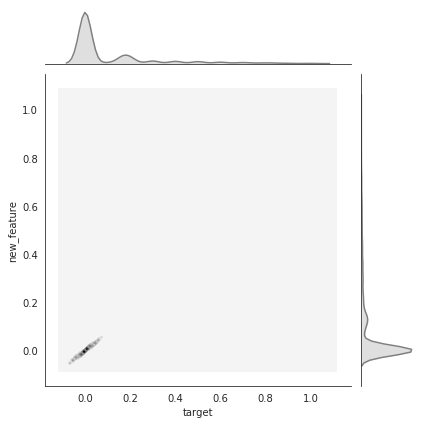

In [53]:
import scipy

import p3_util_plot
var1='target'
var2 = 'new_feature'

pearson = scipy.stats.pearsonr(df_train_filtered_sample[var1],df_train_filtered_sample[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))
p3_util_plot.df_sns_joint_plot(df_train_filtered_sample, var1, var2, parameter_kind='kde', parameter_color='grey')

Using correlation matrix for weighting features when building `new_feature` improve global correlation between 
`new_feature` and `target` (0.989 vs 0.977).

#### Display Pearson coefficient between all features against `target`

In [83]:
df_train_filtered_sample.columns

Index(['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat',
       'sexual_explicit'],
      dtype='object')

In [55]:
import scipy
import p3_util_plot

var1 = 'target'
for var2 in df_train_filtered_sample.columns :
    if var2 != 'target' :
        #p3_util_plot.df_sns_joint_plot(df_train_filtered_sample, var1, var2, parameter_kind='reg', parameter_color='grey')


        pearson = scipy.stats.pearsonr(df_train_filtered_sample[var1],df_train_filtered_sample[var2])
        print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))
    else :
        pass


Pearson coefficient between (target,severe_toxicity) = 0.4058020745302237

Pearson coefficient between (target,obscene) = 0.5004938914680612

Pearson coefficient between (target,identity_attack) = 0.448080654771592

Pearson coefficient between (target,insult) = 0.9253985594798431

Pearson coefficient between (target,threat) = 0.29627000932655323

Pearson coefficient between (target,sexual_explicit) = 0.2445880052754865

Pearson coefficient between (target,new_feature) = 0.9897087258200451


#### Correlation between `insult` and `target`

/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



Pearson coefficient between (target,insult) = 0.9253985594798431


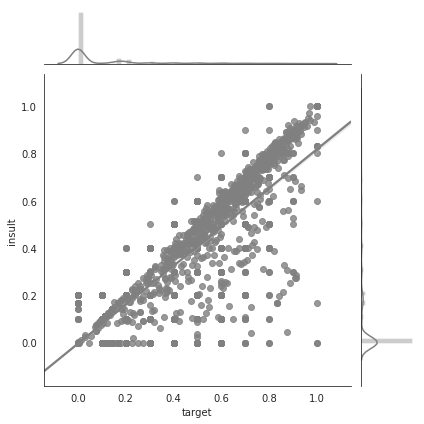

In [56]:
import scipy
import p3_util_plot

var1 = 'target'
var2 = 'insult'
p3_util_plot.df_sns_joint_plot(df_train_filtered_sample, var1, var2, parameter_kind='reg', parameter_color='grey')


pearson = scipy.stats.pearsonr(df_train_filtered_sample[var1],df_train_filtered_sample[var2])
print("\nPearson coefficient between ({},{}) = {}".format(var1,var2, pearson[0]))

In [82]:
df_train_filtered_sample.columns

Index(['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat',
       'sexual_explicit'],
      dtype='object')

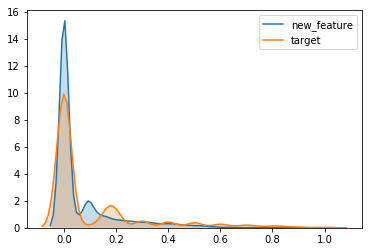

In [116]:
import seaborn as sns
for col in ['new_feature','target']:
    sns.kdeplot(df_train_sample[col], shade=True)

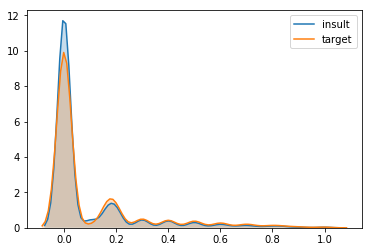

In [118]:
import seaborn as sns
for col in ['insult','target']:
    sns.kdeplot(df_train_sample[col], shade=True)

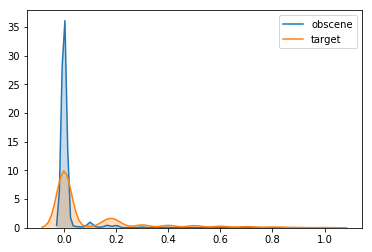

In [119]:
import seaborn as sns
for col in ['obscene','target']:
    sns.kdeplot(df_train_sample[col], shade=True)

In [115]:
df_train_sample.columns

Index(['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit', 'new_feature'],
      dtype='object')

### Weights issued from a linear regression

#### Target is extracted from dataframe

Dataframe keeps features used only for linear regression.

In [57]:
df_train_sample.columns

Index(['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult',
       'threat', 'sexual_explicit', 'new_feature'],
      dtype='object')

In [58]:
if 'target' in df_train_sample.columns:
    df_train_label = df_train_sample.pop('target')

if 'new_feature' in df_train_sample.columns:
    del(df_train_sample['new_feature'])

In [59]:
Pearson coefficient between (target,new_feature) = 0.9897087258200451
df_train_sample.shape

(18049, 6)

#### Data is standardized

In [60]:
from sklearn.preprocessing import StandardScaler
if False :
    std_scaler = StandardScaler()
    print(std_scaler.fit(df_train_sample))

    X_std = std_scaler.transform(df_train_sample)
else :
    X_std = df_train_sample.copy()

#### Linear regression model is built

In [61]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression().fit(X_std, df_train_label)

#### Displaying correlation coefficient

Coefficient issued from linear regression and  those issued from matrix correlation are both displayed.

Some of them have closed values, such as `threat` and `identity_attack`, others strongly differ.

In [62]:
for feature, lr_coef, corr_coef in zip(df_train_sample.columns, model_regression.coef_,X_std_corr['target'][1:]):
    print("Feature: {} : linear regression coeff= {} / Correlation matrix coeff= {}".format(feature, lr_coef, corr_coef))

Feature: severe_toxicity : linear regression coeff= -0.05362561443422439 / Correlation matrix coeff= 0.40580207453035044
Feature: obscene : linear regression coeff= 0.2619629875316454 / Correlation matrix coeff= 0.5004938914679019
Feature: identity_attack : linear regression coeff= 0.40888237843007297 / Correlation matrix coeff= 0.44808065477165393
Feature: insult : linear regression coeff= 0.9155839990091565 / Correlation matrix coeff= 0.9253985594798301
Feature: threat : linear regression coeff= 0.6734955460989804 / Correlation matrix coeff= 0.29627000932665676
Feature: sexual_explicit : linear regression coeff= 0.31847938964928624 / Correlation matrix coeff= 0.24458800527543303


In [69]:
df_test_sample.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'created_date', 'publication_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [70]:
if 'target' in df_test_sample.columns : 
    df_test_target = df_test_sample.pop('target')
df_test_sample.columns

Index(['id', 'comment_text', 'severe_toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'created_date', 'publication_id', 'article_id',
       'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [71]:
list_feature
if 'target' in list_feature :
    list_feature.remove('target')
print(list_feature)

['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']


In [72]:
df_test_sample = df_test_sample[list_feature]

In [ ]:
X_std = std_scaler.transform(df_test_sample)

In [76]:
model_regression.score(X_std, df_test_target)

-48.750536382222116

### <font color=blus>Distribution of `target` from test dataset</font>

In [122]:
df_test_sample.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'created_date', 'publication_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [123]:
import numpy as np
import pandas as pd

df_train_sample.shape
arr_unit = np.array([1. for value in list_feature])
ser_weight_unit =pd.Series( arr_unit, index=list_feature)
print(ser_weight_unit)

target             1.0
severe_toxicity    1.0
obscene            1.0
identity_attack    1.0
insult             1.0
threat             1.0
sexual_explicit    1.0
dtype: float64


In [124]:
import p9_util

df_test_sample = p9_util.df_weight_newFeature(df_test_sample, ser_weight_unit, list_feature, 'new_feature')
print()
print(df_test_sample.columns)
print(df_test_sample.shape)

target 1.0
severe_toxicity 1.0
obscene 1.0
identity_attack 1.0
insult 1.0
threat 1.0
sexual_explicit 1.0

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'created_date', 'publication_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count', 'new_feature'],
      dtype='object')
(6016, 21)


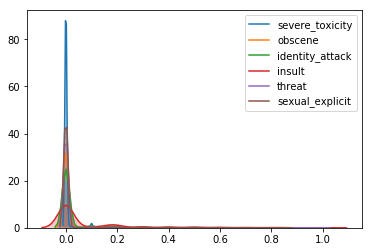

In [74]:
import seaborn as sns

for col in df_test_sample.columns:
    sns.kdeplot(df_test_sample[col], shade=True)

This display shows a long trail above 0.2 `target` column is added to `df_test_sample`. 

This will allow to extract a subset of `df_test_sample` 
filtered with `target` >0.2

In [75]:
if 'target' not in df_test_sample.columns:
    df_test_sample['target'] = df_test_target

df_test_sample_filtered = df_test_sample.query('target<0.2')

In [76]:
df_test_sample_filtered.columns

Index(['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat',
       'sexual_explicit', 'target'],
      dtype='object')

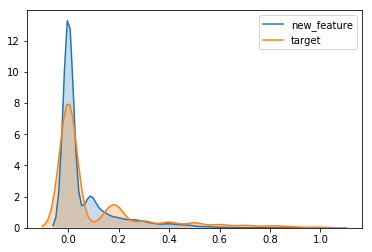

In [125]:
import seaborn as sns

for col in ['new_feature','target']:
    z_ = sns.kdeplot(df_test_sample[col], shade=True)


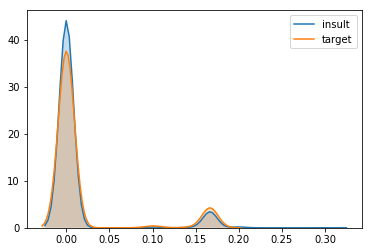

In [79]:
import seaborn as sns

for col in ['insult','target']:
    z_ = sns.kdeplot(df_test_sample_filtered[col], shade=True)

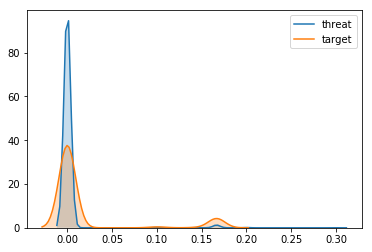

In [430]:
import seaborn as sns

for col in ['threat','target']:
    z_ = sns.kdeplot(df_test_sample_filtered[col], shade=True)

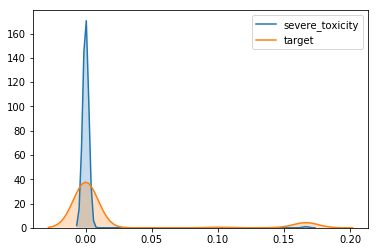

In [431]:
import seaborn as sns

for col in ['severe_toxicity','target']:
    z_ = sns.kdeplot(df_test_sample_filtered[col], shade=True)

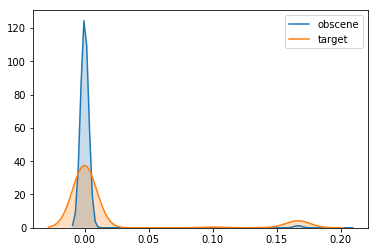

In [432]:
import seaborn as sns

for col in ['obscene','target']:
    z_ = sns.kdeplot(df_test_sample_filtered[col], shade=True)

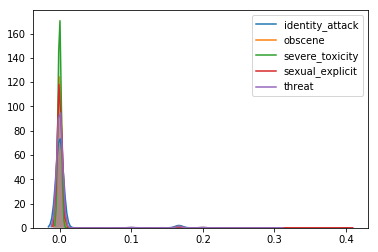

In [433]:
import seaborn as sns

for col in ['identity_attack','obscene', 'severe_toxicity','sexual_explicit','threat']:
    z_ = sns.kdeplot(df_test_sample_filtered[col], shade=True)

In [436]:
from scipy.stats import kstest
col='insult'
kstest(df_test_sample_filtered[col], 'norm')

KstestResult(statistic=0.5, pvalue=0.0)

### <font color=blus>Distribution of `target` from train dataset</font>

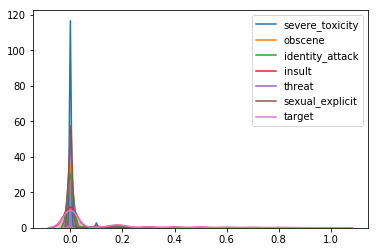

In [439]:
import seaborn as sns

for col in df_train_sample.columns:
    sns.kdeplot(df_train_sample[col], shade=True)

In [455]:
if 'target' not in df_train_sample.columns:
    df_train_sample['target'] = df_train_label

df_train_sample_filtered = df_train_sample.query('target>0.1')
df_train_sample_filtered.shape, df_train_sample.shape

((5296, 7), (18049, 7))

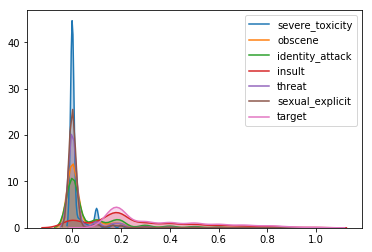

In [456]:
import seaborn as sns

for col in df_train_sample_filtered.columns:
    sns.kdeplot(df_train_sample_filtered[col], shade=True)

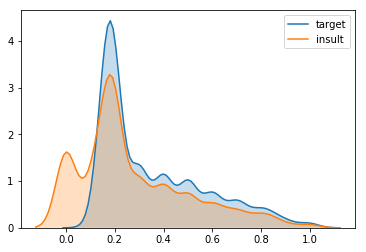

In [457]:
import seaborn as sns

for col in ['target','insult'] :
    sns.kdeplot(df_train_sample_filtered[col], shade=True)

    We can conclude that insult contributes the most to a toxic comment

In [121]:
df_test_sample.shape, df_train_sample.shape

((6016, 20), (18049, 8))